In [211]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import math
import warnings
warnings.filterwarnings('ignore')


In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading Data

In [213]:
# Reading the dataset

df = pd.read_csv('train.csv')

In [214]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Analysis

In [216]:
# define  a function to check values containing null values

def check_nan():
    threshold=0
    nan_counts = df.isnull().sum()
    high_nan_columns = nan_counts[nan_counts > (threshold * len(df))]
    print(list(high_nan_columns.index))
    return high_nan_columns.index
    
high_nan_columns = check_nan()

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [217]:
# Dropping PoolQC because of its very low non null percentage

df.drop('PoolQC',axis=1,inplace=True)

# Since all the below mentioned categories have a category called NA which is interpreted as null,filling that with "Not Applicable"

na_fillable_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence','MiscFeature']
df[na_fillable_cols] = df[na_fillable_cols].fillna("Not Applicable")

high_nan_columns = check_nan()

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']


In [218]:
df[high_nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
 4   GarageYrBlt  1379 non-null   float64
dtypes: float64(3), object(2)
memory usage: 57.2+ KB


In [219]:
# Since the below mentioned features have less number null values removing rows that has null values.

subset_rows = ['MasVnrType','MasVnrArea','Electrical']
df.dropna(subset=subset_rows,how='any',inplace=True)
high_nan_columns = check_nan()
df[high_nan_columns].info()

['LotFrontage', 'GarageYrBlt']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1194 non-null   float64
 1   GarageYrBlt  1370 non-null   float64
dtypes: float64(2)
memory usage: 34.0 KB


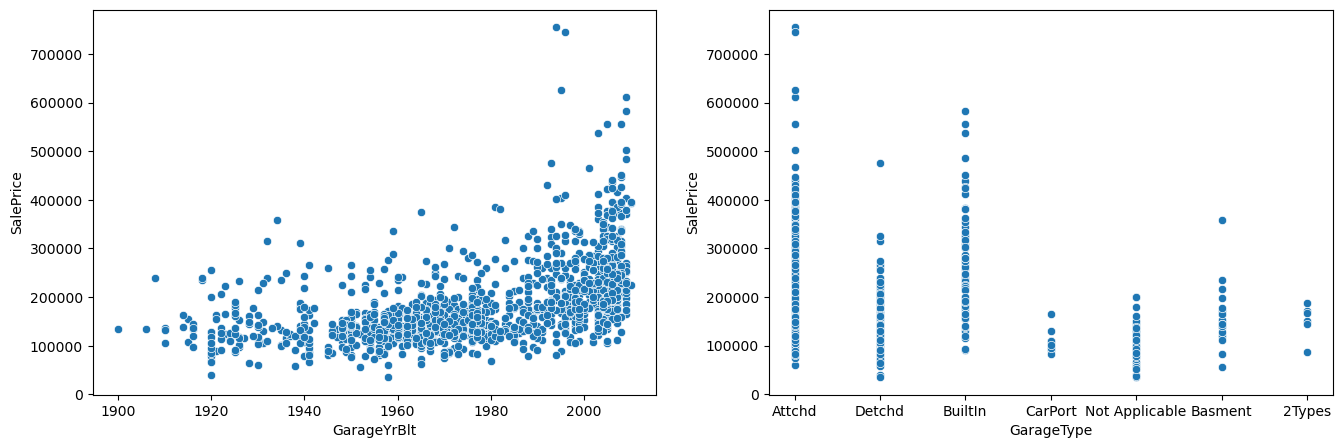

In [220]:
# Analysing what to impute for GarageYrBlt null values

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df["GarageYrBlt"],y = df["SalePrice"])
plt.subplot(1,2,2)
sns.scatterplot(x = df["GarageType"],y = df["SalePrice"])
plt.show()


- Garage Not Applicable rows are that misses GarageYrBuilt,so inorder to use other availble data in that row and not to discard that,replacing it with min year in GarageYrBlt.
- This is made under the assumption that old garages tend to sell for less prices acquired from GarageType and SalePrice graph.


In [221]:
# replacing nan with min year ,since no garage also has less saleprice and  old built garage also has low saleprice

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].min())
high_nan_columns = check_nan()
df[high_nan_columns].info()

['LotFrontage']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1194 non-null   float64
dtypes: float64(1)
memory usage: 22.7 KB


<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

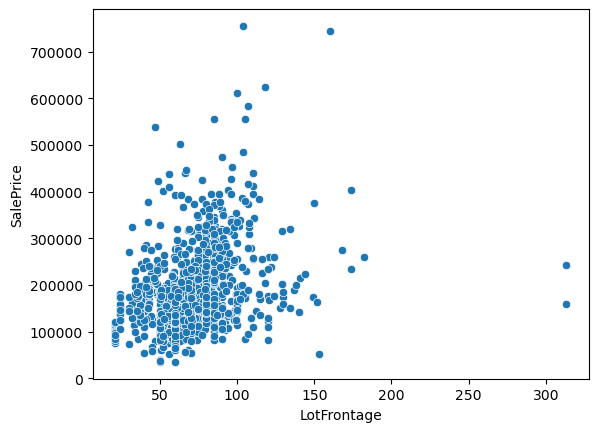

In [222]:
sns.scatterplot(x = df["LotFrontage"],y  =df["SalePrice"])

- It seems that there is a linear relationship between LotFronatge and Sale Price so we cant remove that column,we could remove the rows or impute values.
- Since more than 300 rows should be removed,we will not do that now,instead we will impute the data using mean,which we will do after splitting data to avoid data leakage.
  

In [223]:
# Dropping Id column since it doesnt contain any information
df.drop(columns=['Id'],axis=1,inplace=True)

In [224]:
# Seperating numerical variables from total df,by seperating using datatype int64,float64.

numerical_df = df[df.select_dtypes(include=['int64','float64']).columns]
numerical_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1451.000000  1194.000000    1451.000000  1451.000000  1451.000000   
mean     56.933150    70.027638   10507.808408     6.093728     5.579600   
std      42.350366    24.299302    9992.987081     1.381467     1.113415   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7537.500000     5.000000     5.000000   
50%      50.000000    69.000000    9477.000000     6.000000     5.000000   
75%      70.000000    80.000000   11600.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1451.000000   1451.000000  1451.00000  1451.000000  1451.000000   
mean   1971.092350   1984.760165   103.75672   442.274983    46.838043   
std      30.190266     20.651334   181.10815   455.369276   161.777324   
min    1872.000000   1950.000000     0.00000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.00000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.00000   381.000000     0.000000   
75%    2000.000000   2004.000000   166.00000   707.000000     0.000000   
max    2010.000000   2010.000000  1600.00000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1451.000000  1451.000000  1451.000000  1451.000000   1451.000000   
mean    567.197105  1056.310131  1161.551344   346.742247      5.880772   
std     442.209192   437.914609   385.002532   436.453277     48.771560   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     222.000000   795.000000   882.000000     0.000000      0.000000   
50%     479.000000   991.000000  1086.000000     0.000000      0.000000   
75%     808.000000  1297.500000  1391.000000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1451.000000   1451.000000   1451.000000  1451.000000  1451.000000   
mean   1514.174363      0.423846      0.057891     1.562371     0.381116   
std     525.799521      0.518842      0.239449     0.550301     0.502574   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1128.000000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1451.000000   1451.000000   1451.000000  1451.000000  1451.000000   
mean       2.866988      1.046175      6.516885     0.612681  1973.979325   
std        0.815086      0.219571      1.626576     0.643443    29.985875   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1958.000000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1451.000000  1451.000000  1451.000000  1451.000000    1451.000000   
mean      1.764990   472.525155    94.412819    46.422467      21.952447   
std       0.748728   214.171752   125.436852    66.060150      61.108223   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   327.500000     0.000000     0.000000       0.000000   
50%       2.000000   478.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000

- MSSubClass and MoSold are categorical variables so removing that from numerical_df.

In [225]:
# Dropping categorical variables in int64 format

numerical_df.drop(["MSSubClass","MoSold"],axis=1,inplace=True)
print(numerical_df.shape)
numerical_df.describe()

(1451, 35)


LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1194.000000    1451.000000  1451.000000  1451.000000  1451.000000   
mean     70.027638   10507.808408     6.093728     5.579600  1971.092350   
std      24.299302    9992.987081     1.381467     1.113415    30.190266   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7537.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9477.000000     6.000000     5.000000  1972.000000   
75%      80.000000   11600.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd  MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1451.000000  1451.00000  1451.000000  1451.000000  1451.000000   
mean    1984.760165   103.75672   442.274983    46.838043   567.197105   
std       20.651334   181.10815   455.369276   161.777324   442.209192   
min     1950.000000     0.00000     0.000000     0.000000     0.000000   
25%     1966.000000     0.00000     0.000000     0.000000   222.000000   
50%     1993.000000     0.00000   381.000000     0.000000   479.000000   
75%     2004.000000   166.00000   707.000000     0.000000   808.000000   
max     2010.000000  1600.00000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1451.000000  1451.000000  1451.000000   1451.000000  1451.000000   
mean   1056.310131  1161.551344   346.742247      5.880772  1514.174363   
std     437.914609   385.002532   436.453277     48.771560   525.799521   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.000000   882.000000     0.000000      0.000000  1128.000000   
50%     991.000000  1086.000000     0.000000      0.000000  1464.000000   
75%    1297.500000  1391.000000   728.000000      0.000000  1776.000000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1451.000000   1451.000000  1451.000000  1451.000000   1451.000000   
mean       0.423846      0.057891     1.562371     0.381116      2.866988   
std        0.518842      0.239449     0.550301     0.502574      0.815086   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1451.000000   1451.000000  1451.000000  1451.000000  1451.000000   
mean       1.046175      6.516885     0.612681  1973.979325     1.764990   
std        0.219571      1.626576     0.643443    29.985875     0.748728   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1958.000000     1.000000   
50%        1.000000      6.000000     1.000000  1977.000000     2.000000   
75%        1.000000      7.000000     1.000000  2001.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1451.000000  1451.000000  1451.000000    1451.000000  1451.000000   
mean    472.525155    94.412819    46.422467      21.952447     3.430737   
std     214.171752   125.436852    66.060150      61.108223    29.406940   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     327.500000     0.000000     0.000000       0.000000     0.000000   
50%     478.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.00

In [226]:
# Seperating categorical variables from total df,by seperating using datatype object.

categorical_df = df[df.select_dtypes(include=['object']).columns]

# features removed from numerical_df are added here

add_col = ["MSSubClass","MoSold"]
categorical_df[add_col]=df[add_col]

print(categorical_df.shape)
print(categorical_df.columns)

(1451, 44)
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MSSubClass', 'MoSold'],
      dtype='object')


## Data Visualization

In [227]:
# funtion to draw scatter plot when a dataframe is given

def draw_scatter_plot(data):
    
    plt.figure(figsize=(15,math.ceil(len(data.columns)/2)*4))
    for i,col in enumerate(data.columns):
        plt.subplot(math.ceil(len(data.columns)/2),2,i+1)
        sns.scatterplot(x=data[col], y=df["SalePrice"],palette= "RdGy")  
        plt.xlabel(col)
    plt.show()   


In [228]:
# funtion to draw box plot when a dataframe is given

def draw_box_plot(data):
    
    plt.figure(figsize=(15,math.ceil(len(data.columns)/2)*4))
    for i,col in enumerate(data.columns):
        plt.subplot(math.ceil(len(data.columns)/2),2,i+1)
        sns.boxplot(x=data[col], y=df["SalePrice"],palette= "gist_rainbow")  
        plt.xlabel(col)
    plt.show()  

# funtion to draw hist plot when a dataframe is given

def draw_hist_plot(data):
    
    plt.figure(figsize=(18,math.ceil(len(data.columns)/4)*4))
    for i,col in enumerate(data.columns):
        plt.subplot(math.ceil(len(data.columns)/4),4,i+1)
        ax = sns.histplot(x=data[col], stat = "percent")
        ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.1f}%')
        plt.xlabel(col)
    plt.show()  

In [229]:
# funtion to draw box and hist plot when a dataframe is given

def draw_box_dist_plot(data):
    
    plt.figure(figsize=(15,len(data.columns)*4))
    for i,col in enumerate(data.columns):
        
        plt.subplot(len(data.columns),2,(2*i)+1)
        sns.boxplot(x=data[col], y=df["SalePrice"],palette= "gist_rainbow")  
        
        plt.subplot(len(data.columns),2,(2*i)+2)
        ax = sns.histplot(x=data[col], stat = "percent")  
        
        total = data[col].count()

        # annotate the bars with fmt from matplotlib v3.7.0
        ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.1f}%')
        ax.margins(y=0.1)

    plt.show()   

In [230]:
print(len(numerical_df.columns))
print(numerical_df.columns)


35
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')


### Numerical Data

19


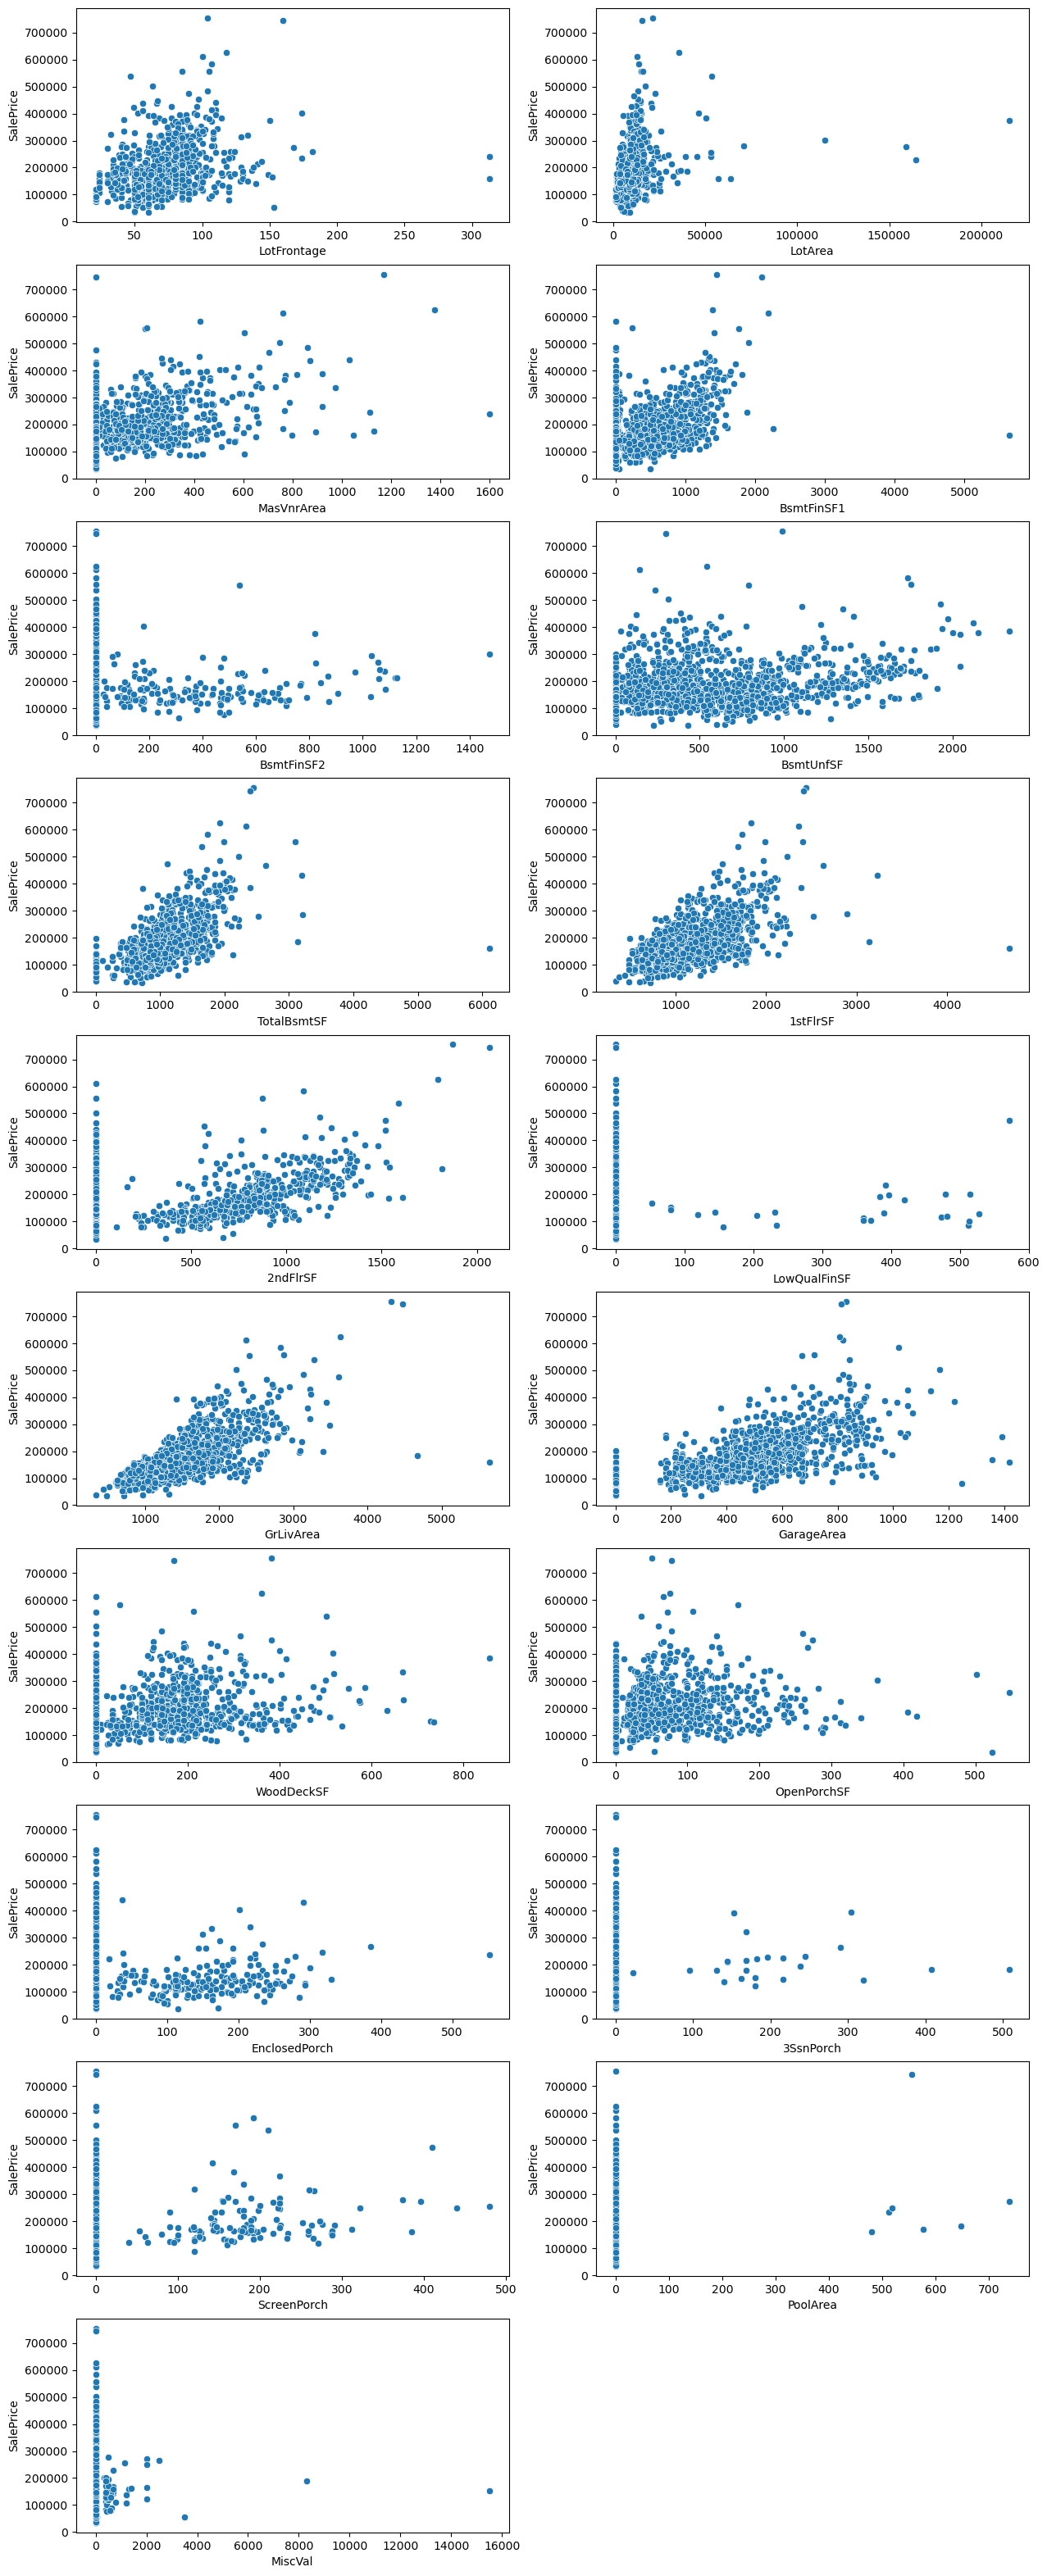

In [231]:
# Analysing the features that contain area information

area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

print(len(area_cols))
draw_scatter_plot(numerical_df[area_cols])

- Most of the features here show linear  and somewhat relationship with the Sale Price,other than MiscVal,ScreenPorch,PoolArea,3SsnPorch,EnclosedPorch


11


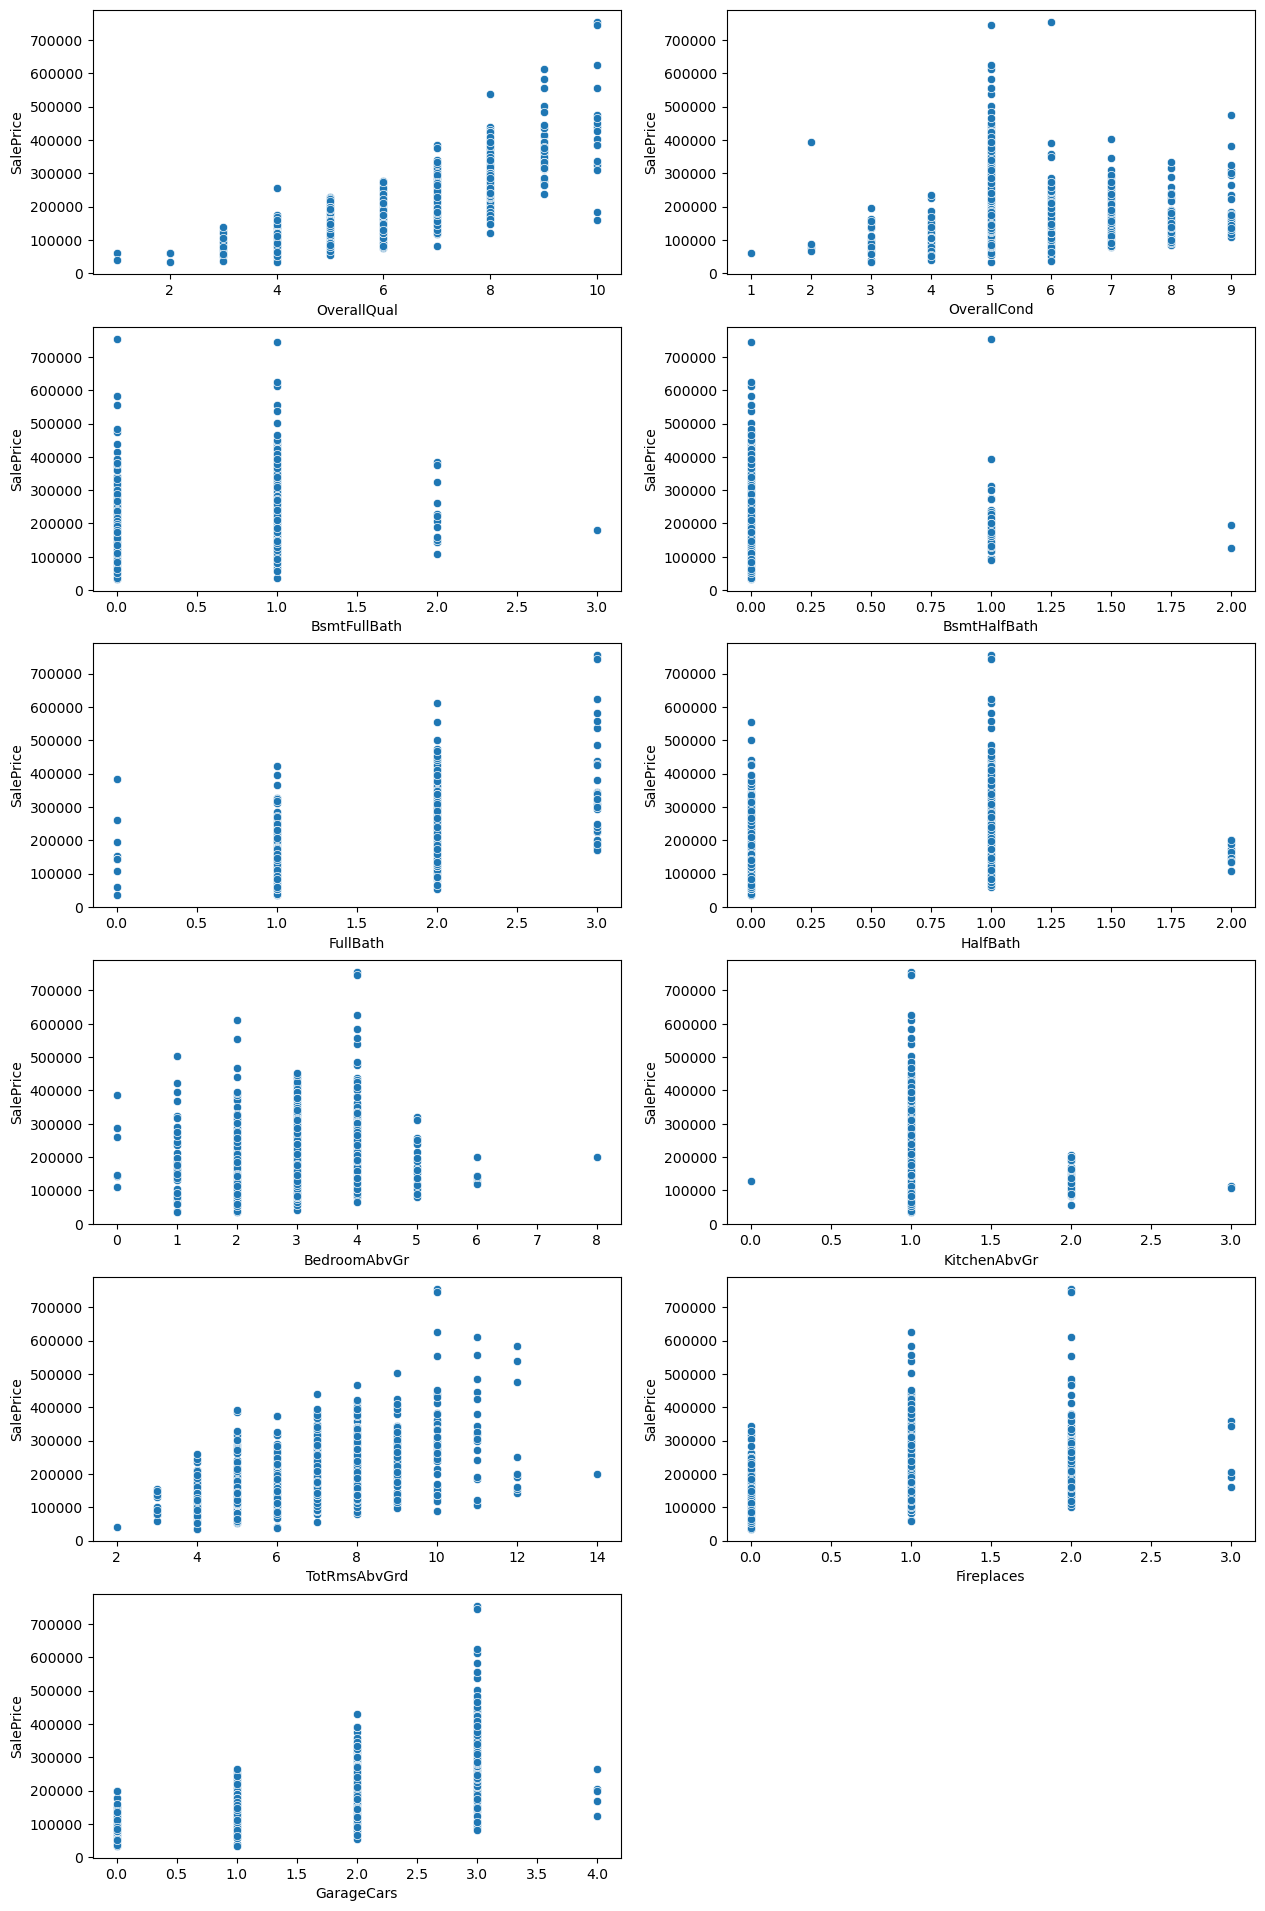

In [232]:
# Analysing the ordinal features in numerical data

numerical_ordinal_cols = [ 'OverallQual', 'OverallCond', 
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars']

print(len(numerical_ordinal_cols))
draw_scatter_plot(numerical_df[numerical_ordinal_cols])

- When OverallQual and OverallCond increases base salePrice increases.
- Mostly BsmtFullBath has 0 or 1 values,which doesnt show that much variation in price.
- When BsmtHalfBath increases base Sale Price increases,but count of houses having it decreases.
- When FullBath and HalfBath increases ,base SalePrice increases.
- When BedroomAbvGr increases,baseSale Price increases.
- Most of the houses have 2 KitchenAbvGr and base price increases when this increases.
- Same goes with GarageCars,Fireplaces,TotRmsAbvGrd , when it increases,base SalePrice increases


4


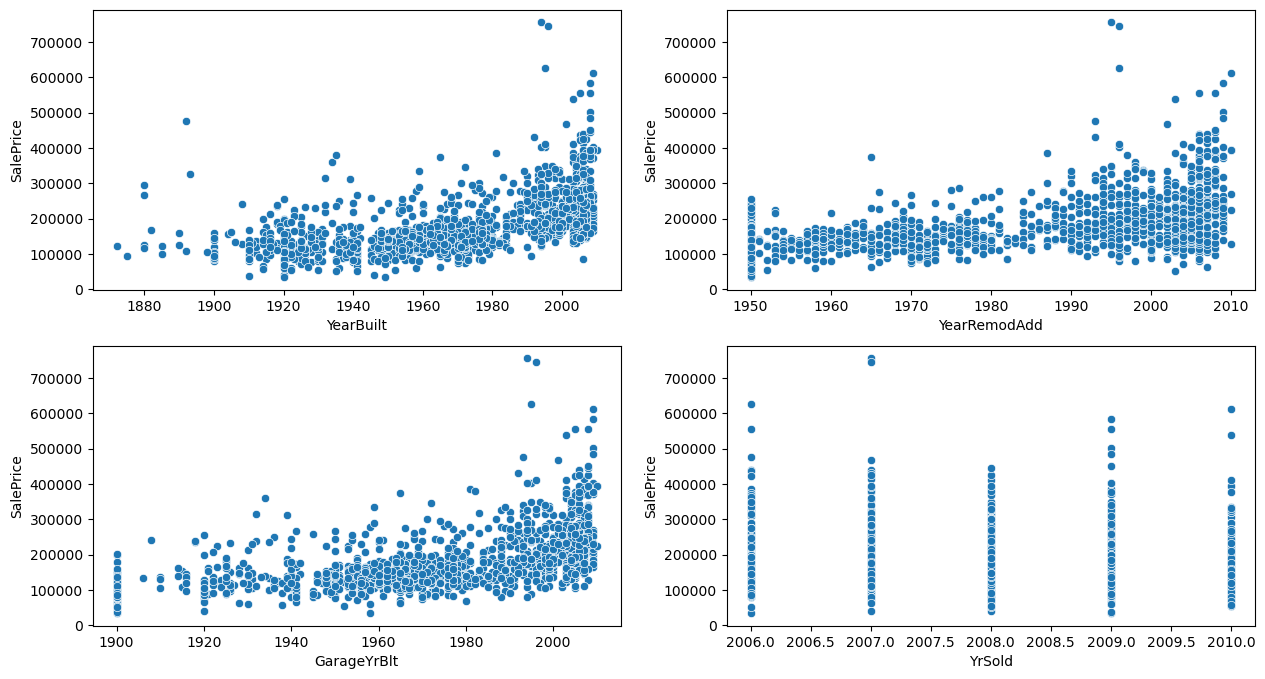

In [233]:
# Analysing the features that contain year information

year_cols = [ 'YearBuilt',
       'YearRemodAdd','GarageYrBlt', 'YrSold']

print(len(year_cols))
draw_scatter_plot(numerical_df[year_cols])

- When YearBuilt,YearRemodAdd,GarageYrBlt increases,SalePrice increases.
- So recent built,recent remodeled,recent garage built houses tend to sell for high prices.
- YrSold doesn't seem to impact the SalePrice that much

### Categorical Data

In [234]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MSSubClass', 'MoSold'],
      dtype='object')

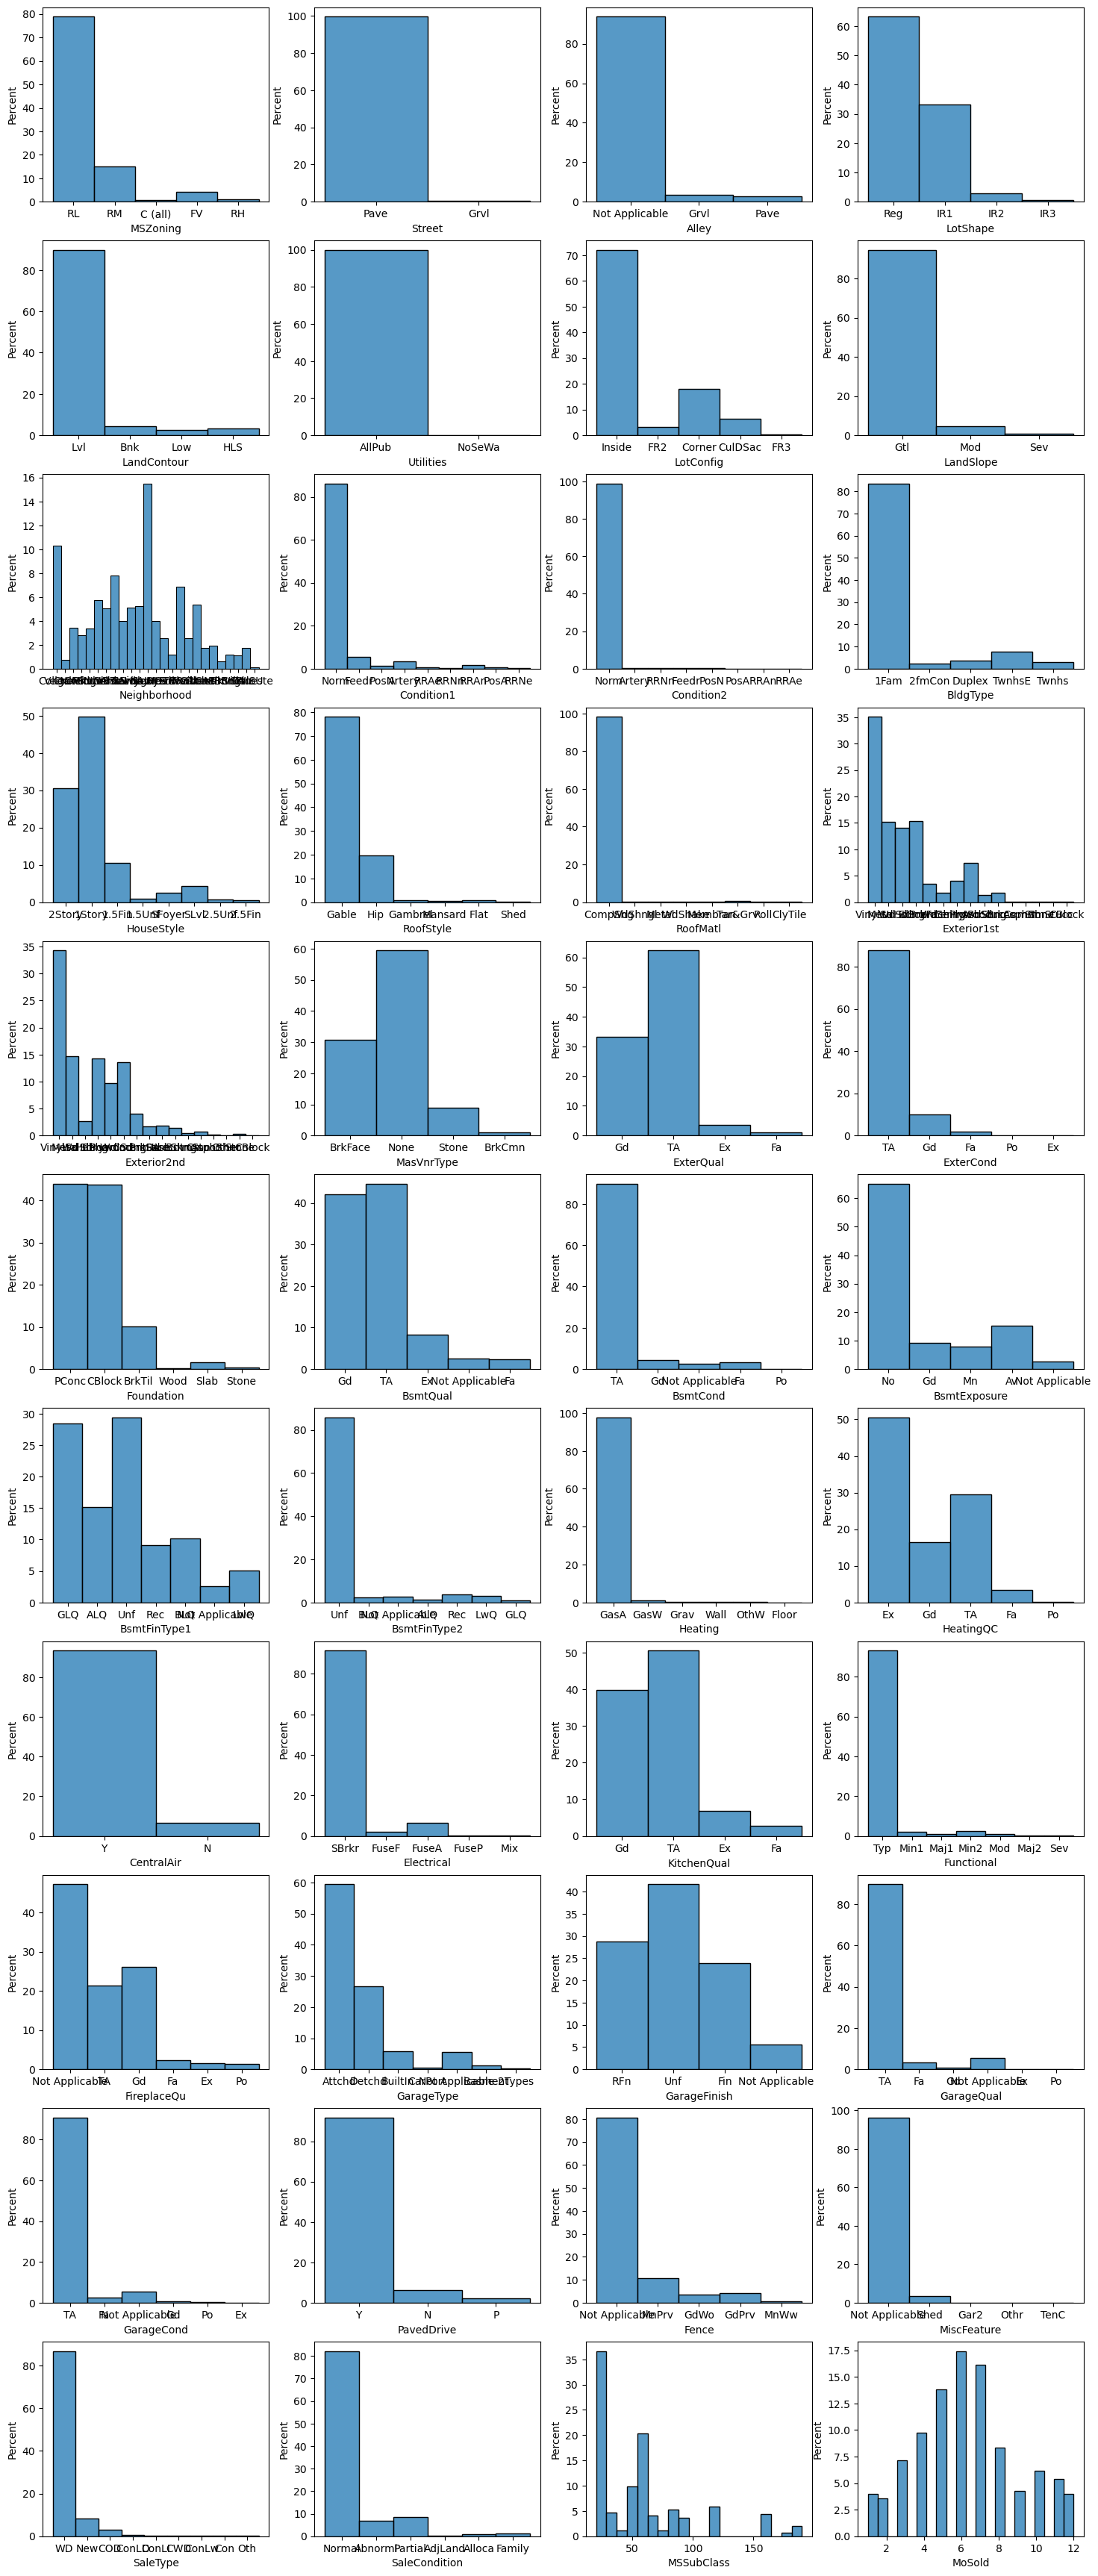

In [235]:
# Checking the distribution of all categorical data

draw_hist_plot(categorical_df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold']])

- **Since there are multiple categories with very less percentage of values are present in the feature, in order to avoid having too many dummy features,merging them into one "Other" Category.**

In [236]:
# Defining a function to merge categories with low percentage as a common "Other" Category

def merge_categories(data):
    
    for col in data.columns:
        # Calculate category frequencies
        category_counts = data[col].value_counts()
        print("\n",col)
        
        # Define a threshold for combining categories (adjust as needed)
        # Categories less than 20 % of its nominal contributable frequency is removed
        # nominal contributable frequency = total_percentage / category_counts_len
        threshold = (100/len(category_counts)) * 0.2 
        
        # Identify categories below the threshold
        categories_to_combine = category_counts[(category_counts / len(data[col]))*100 < threshold].index.tolist()
        
        # Combine low-frequency categories into a single category
        if len(categories_to_combine)>1:
            print("Combining ",categories_to_combine)
            data[col] = data[col].apply(lambda x: 'Other' if x in categories_to_combine else x)

    return data


In [237]:
# Merging only the variables that will remain categorical,left out are ordinal variables that will be kept as numerical

merge_col = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType',  'Foundation',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'Electrical', 
       'Functional',  'GarageType', 'GarageFinish', 
        'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold']

categorical_df[merge_col] = merge_categories(categorical_df[merge_col])


 MSZoning
Combining  ['RH', 'C (all)']

 Street

 Alley
Combining  ['Grvl', 'Pave']

 LotShape
Combining  ['IR2', 'IR3']

 LandContour
Combining  ['Bnk', 'HLS', 'Low']

 Utilities

 LotConfig
Combining  ['FR2', 'FR3']

 LandSlope
Combining  ['Mod', 'Sev']

 Neighborhood
Combining  ['Veenker', 'NPkVill', 'Blueste']

 Condition1
Combining  ['RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe']

 Condition2
Combining  ['Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe']

 BldgType
Combining  ['Duplex', 'Twnhs', '2fmCon']

 HouseStyle
Combining  ['1.5Unf', '2.5Unf', '2.5Fin']

 RoofStyle
Combining  ['Flat', 'Gambrel', 'Mansard', 'Shed']

 RoofMatl
Combining  ['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Membran', 'Roll', 'ClyTile']

 Exterior1st
Combining  ['BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock']

 Exterior2nd
Combining  ['ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock']

 MasVnrType

 Foundation
Combining  ['Slab', 'Stone', 'Wood']

 BsmtExposure

 BsmtFinType1

 Bs

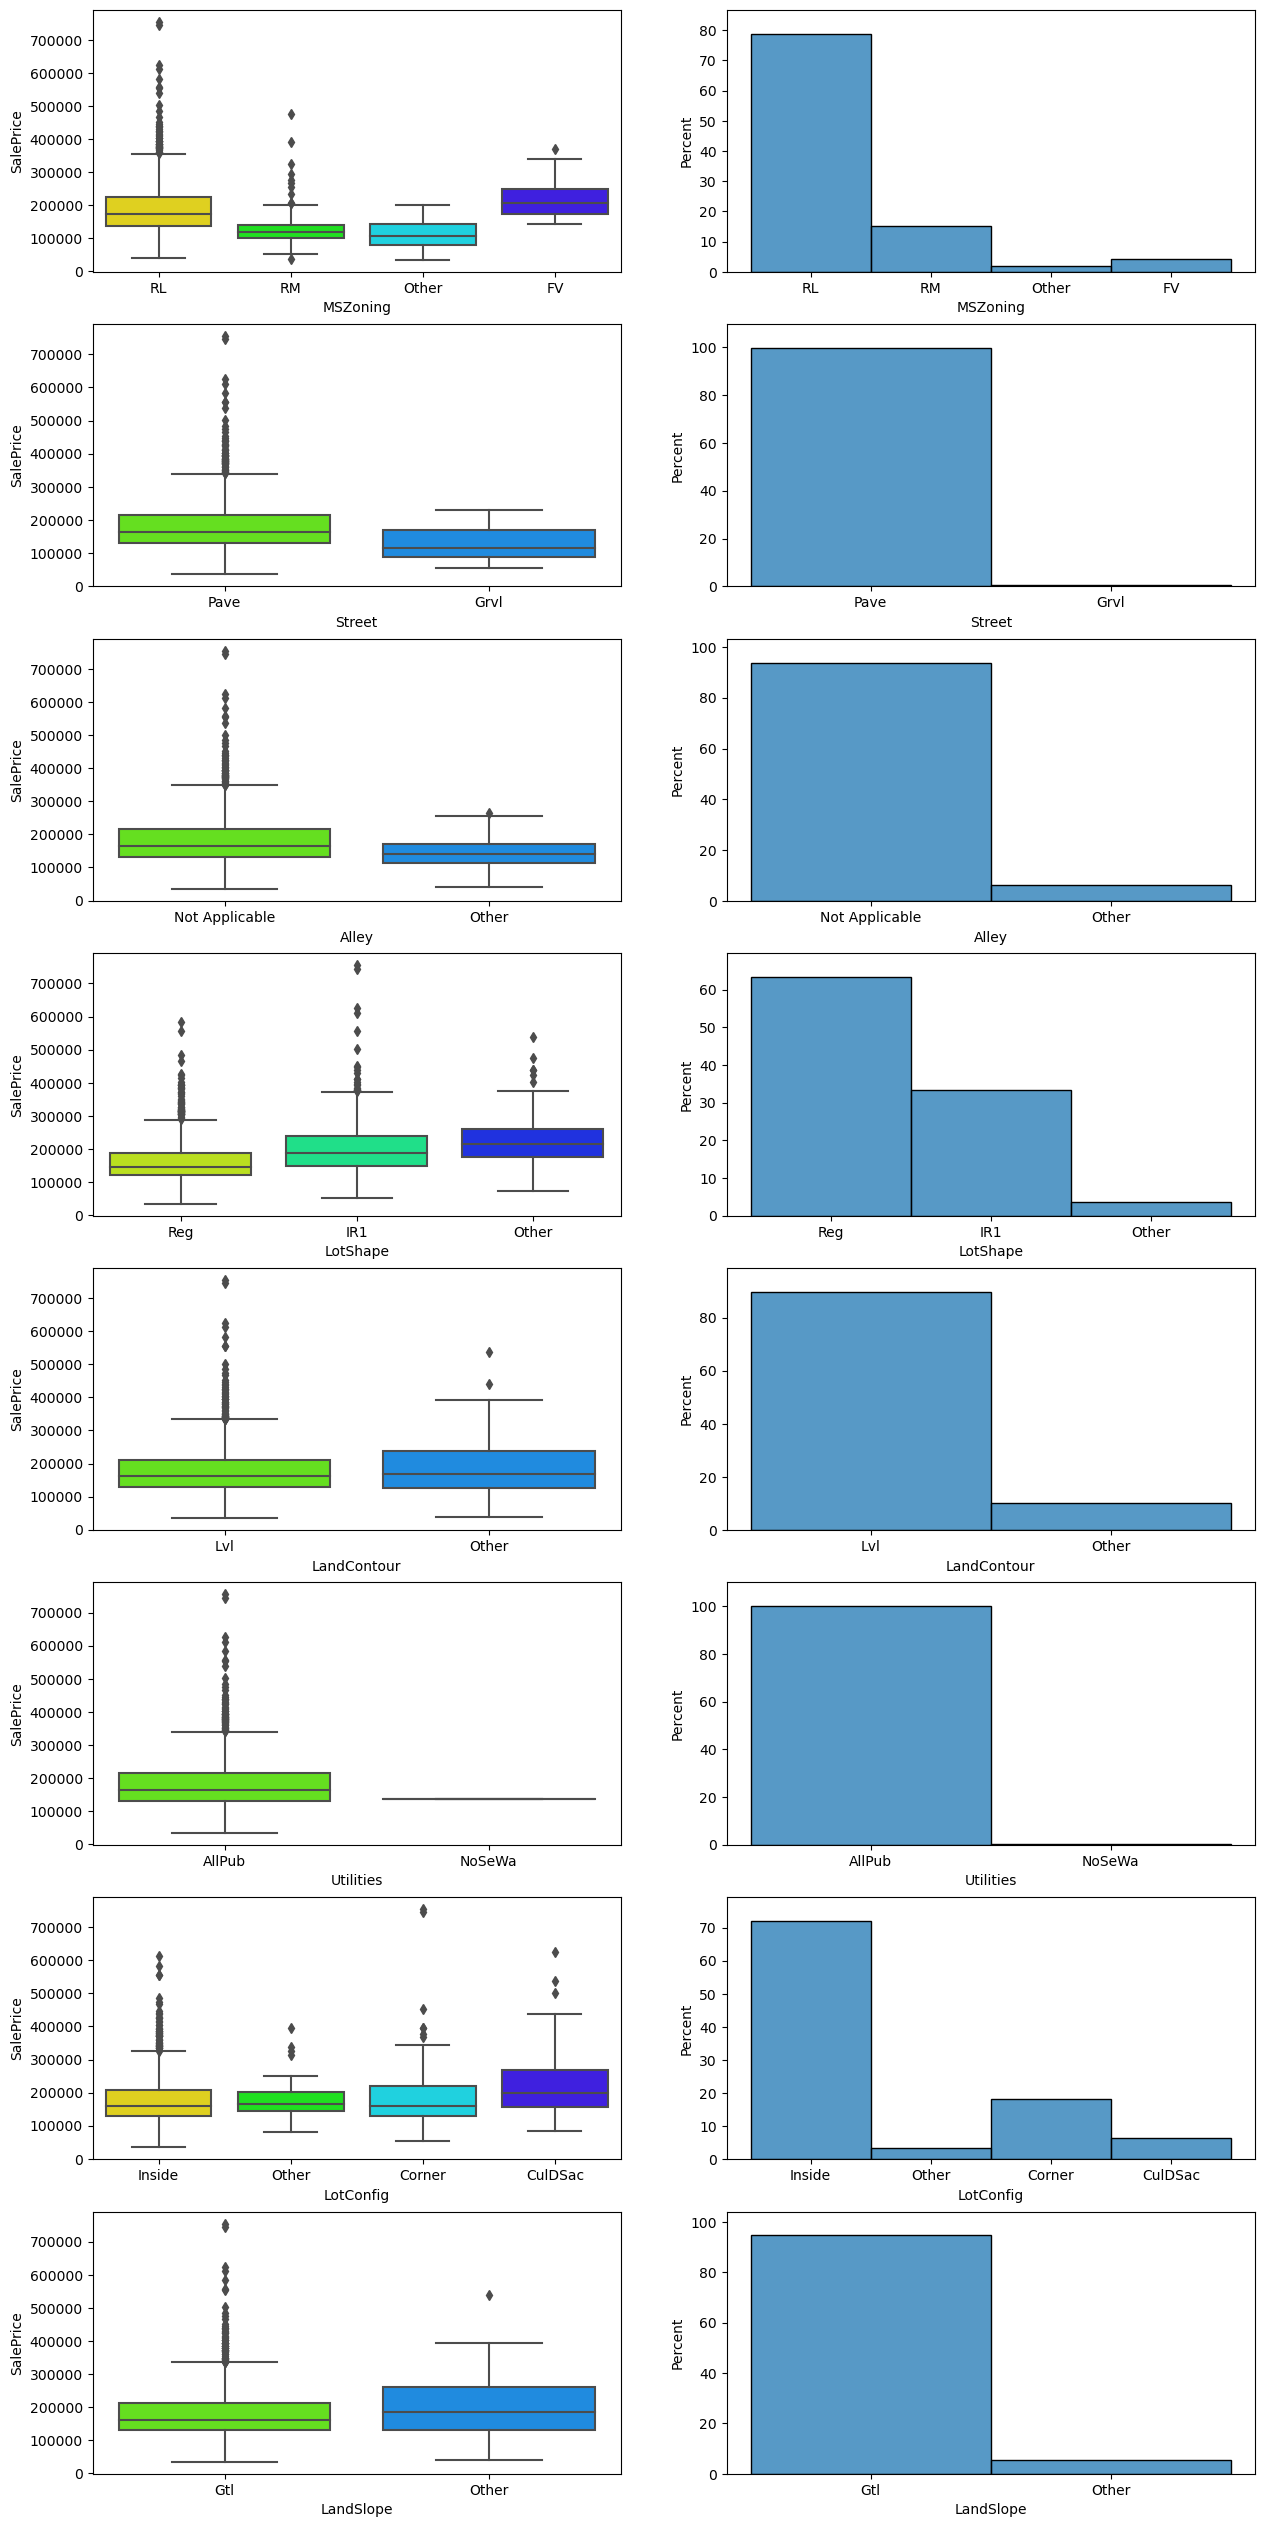

In [238]:
# Analysing a part of categorical variables

draw_box_dist_plot(categorical_df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope']])

- High number of houses are present in Residential Low Density Area.
- Most of the houses have Pave Street and they have slightly higher SalePrice.
- Most of the houses present doesn't have Alley.
- Lot of the houses present are Inside Lot in LotConfig


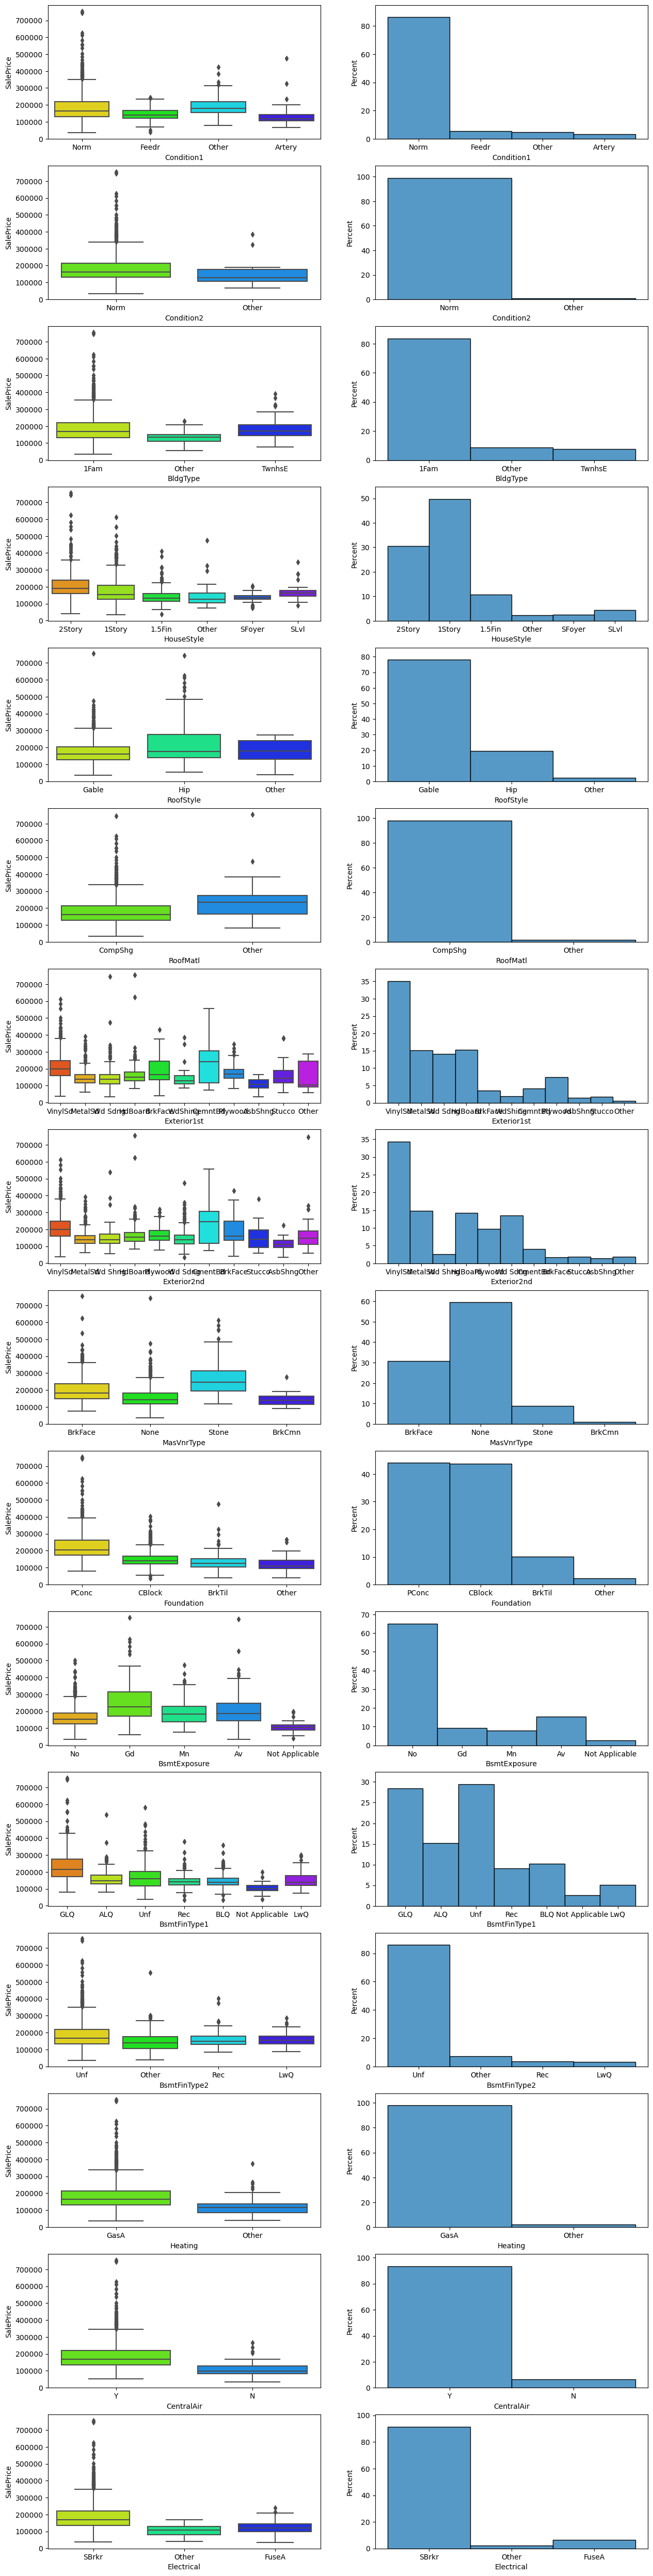

In [239]:
# Analysing a part of categorical variables

draw_box_dist_plot(categorical_df[[ 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType',  'Foundation',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'Electrical']])

- Most of the houses are present in Norm Condition,and that has good selling point than other categories too.
- Large number of 1 Family Houses are sold altogether at slighlty higher price than others.
- Even though 1 story houses are more predominant,2 story houses have high selling value.
- Hip RoofStyled houses sell for a higher value.
- Poured Contrete foundationed houses hold higher value.
- Even though unfinished and Good Living Quarters has same amount of houses sold,Good Living Quarters sold for a higher value

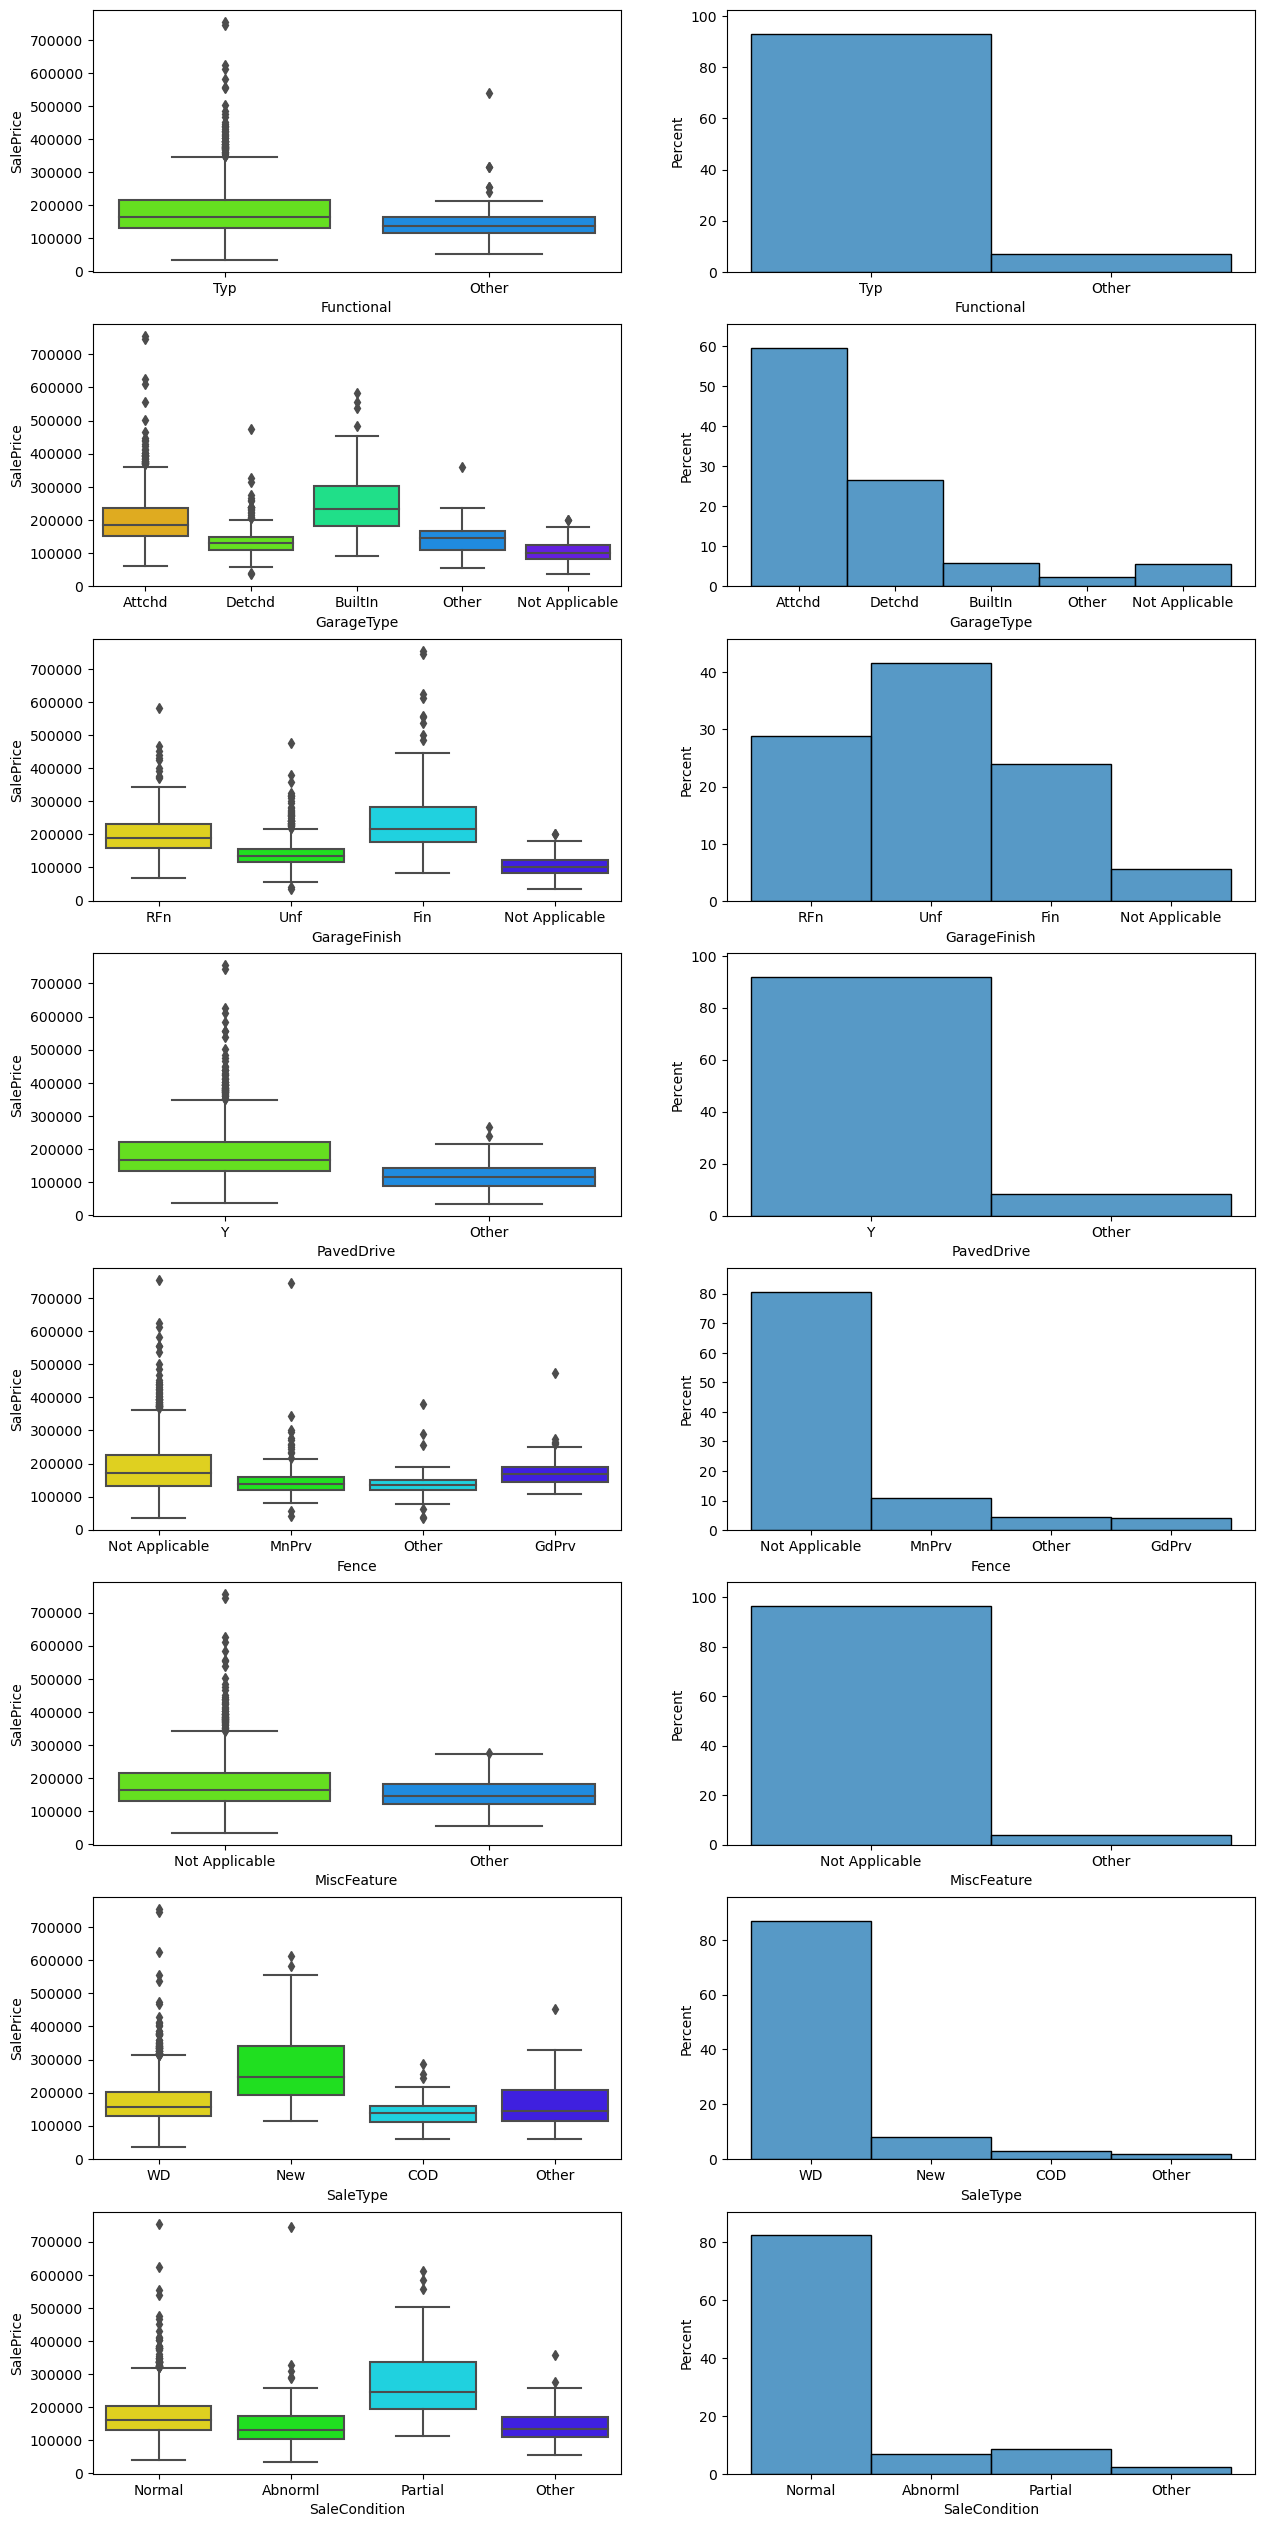

In [240]:
# Analysing a part of categorical variables

draw_box_dist_plot(categorical_df[[ 'Functional',  'GarageType', 'GarageFinish', 
        'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']])

- BuiltIn Garage Type has higher selling value.
- Home just constructed and sold category seems to have high selling point than other Sale Types,the same could be observed in Sale Condition in which "Partial" which is associated with new homes have high value.
- Most of the houses has No Fence,it still sells for a high value,so mostly customers dont care about fence.
  

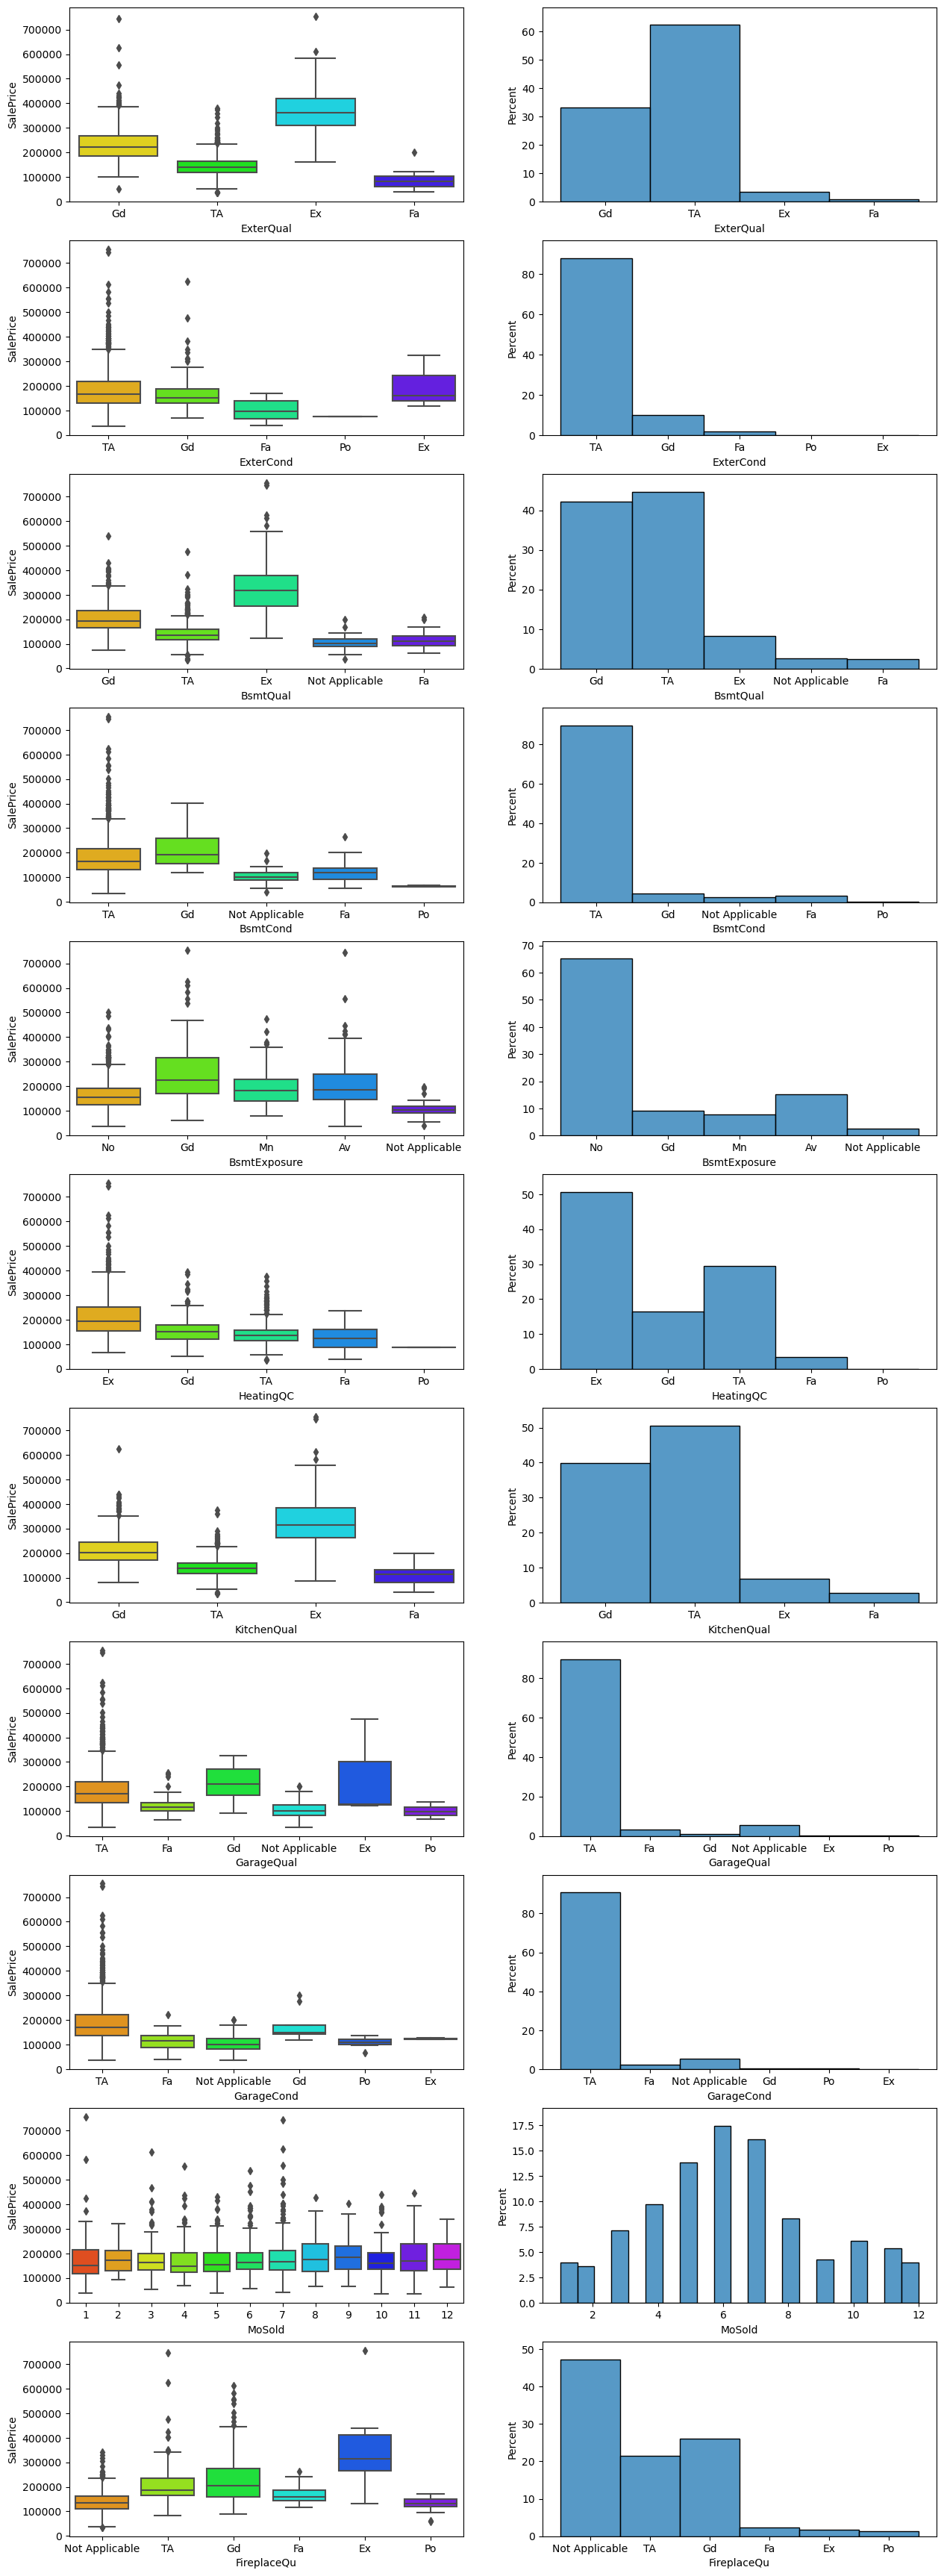

In [241]:
# Analysing a part of categorical variables

ordinal_col  =[ 'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual',
                                  'GarageQual','GarageCond','MoSold','FireplaceQu']
draw_box_dist_plot(categorical_df[ordinal_col])

- Other than GarageCond everything else has its highest quality associated with highest selling value.
- GarageCond doesn't have good number of Excellent and Good houses,so Typical/Average seems to have high value.
- Mid months seem to sell large number of houses,but there is consistent price difference.

In [242]:
# Converting ordinal categorical variables to numerical to avoid multiple dummy variable creation

categorical_df['ExterQual'] = categorical_df['ExterQual'].map({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
categorical_df['ExterCond'] = categorical_df['ExterCond'].map({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
categorical_df['BsmtQual'] = categorical_df['BsmtQual'].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Not Applicable":0})
categorical_df['BsmtCond'] = categorical_df['BsmtCond'].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Not Applicable":0})
categorical_df['BsmtExposure'] = categorical_df['BsmtExposure'].map({"Gd":4,"Av":3,"Mn":2,"No":1,"Not Applicable":0})
categorical_df['HeatingQC'] = categorical_df['HeatingQC'].map({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
categorical_df['KitchenQual'] = categorical_df['KitchenQual'].map({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
categorical_df['GarageQual'] = categorical_df['GarageQual'].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Not Applicable":0})
categorical_df['GarageCond'] = categorical_df['GarageCond'].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Not Applicable":0})
categorical_df['FireplaceQu'] = categorical_df['FireplaceQu'].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"Not Applicable":0})

df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street           Alley LotShape  \
0          60       RL         65.0     8450   Pave  Not Applicable      Reg   
1          20       RL         80.0     9600   Pave  Not Applicable      Reg   
2          60       RL         68.0    11250   Pave  Not Applicable      IR1   
3          70       RL         60.0     9550   Pave  Not Applicable      IR1   
4          60       RL         84.0    14260   Pave  Not Applicable      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7        Ty

#### Correlation heatmap

[ 2  4 10 11 14 21 22 23 24 25 34 35 37 41 42 43 45]


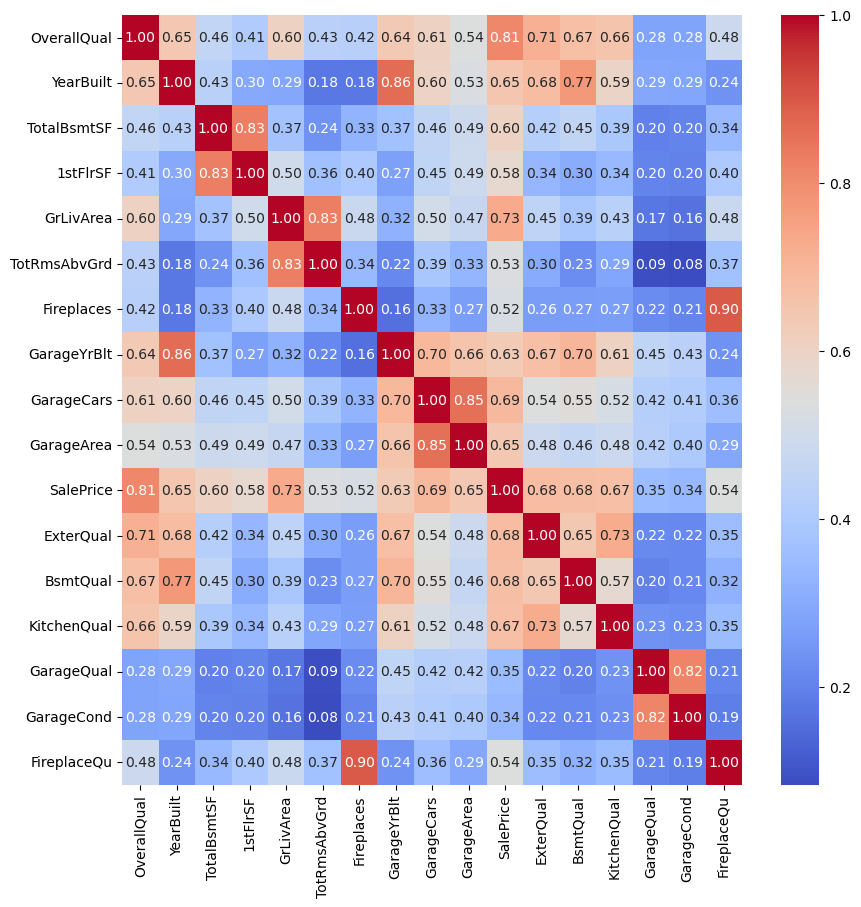

In [243]:
# Combining data that has numerical values as their values

total_df = pd.concat([numerical_df,categorical_df[ordinal_col]],axis=1)
corr_matrix  = total_df.corr(method='spearman')

plt.figure(figsize=(10, 10)) 
# Keeping only the values above a certain threshold for plotting heatmap

threshold = 0.7
keep_cols = np.where(np.sum(np.abs(corr_matrix)>threshold,axis=1)>1)[0]
print(keep_cols)

filtered_corr_matrix = corr_matrix.iloc[keep_cols, keep_cols]
sns.heatmap( filtered_corr_matrix,
            cmap='coolwarm',  # Choose a colormap for visualization
            annot=True,       # Display correlation values in cells
            fmt='.2f') 

plt.show()

**Below Pairs have higher correlation**
- 1stFlrSF, TotalBsmtSF (0.83)
- GarageYrBlt,YearBuilt(0.86)
- GarageArea,GarageCars(0.85)
- GarageQual,GarageCond(0.82)
- Fireplaces,FireplaceQu(0.9)

**So Removing the features less correlated with SalePrice**

In [244]:
# Dropping high correlated data

numerical_df.drop(['1stFlrSF','GarageYrBlt','GarageCars','Fireplaces'],axis=1,inplace=True)
categorical_df.drop('GarageCond',axis=1,inplace=True)

In [245]:
numerical_df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1194.000000    1451.000000  1451.000000  1451.000000  1451.000000   
mean     70.027638   10507.808408     6.093728     5.579600  1971.092350   
std      24.299302    9992.987081     1.381467     1.113415    30.190266   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7537.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9477.000000     6.000000     5.000000  1972.000000   
75%      80.000000   11600.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd  MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1451.000000  1451.00000  1451.000000  1451.000000  1451.000000   
mean    1984.760165   103.75672   442.274983    46.838043   567.197105   
std       20.651334   181.10815   455.369276   161.777324   442.209192   
min     1950.000000     0.00000     0.000000     0.000000     0.000000   
25%     1966.000000     0.00000     0.000000     0.000000   222.000000   
50%     1993.000000     0.00000   381.000000     0.000000   479.000000   
75%     2004.000000   166.00000   707.000000     0.000000   808.000000   
max     2010.000000  1600.00000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1451.000000  1451.000000   1451.000000  1451.000000   1451.000000   
mean   1056.310131   346.742247      5.880772  1514.174363      0.423846   
std     437.914609   436.453277     48.771560   525.799521      0.518842   
min       0.000000     0.000000      0.000000   334.000000      0.000000   
25%     795.000000     0.000000      0.000000  1128.000000      0.000000   
50%     991.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1297.500000   728.000000      0.000000  1776.000000      1.000000   
max    6110.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1451.000000  1451.000000  1451.000000   1451.000000   1451.000000   
mean       0.057891     1.562371     0.381116      2.866988      1.046175   
std        0.239449     0.550301     0.502574      0.815086      0.219571   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1451.000000  1451.000000  1451.000000  1451.000000    1451.000000   
mean       6.516885   472.525155    94.412819    46.422467      21.952447   
std        1.626576   214.171752   125.436852    66.060150      61.108223   
min        2.000000     0.000000     0.000000     0.000000       0.000000   
25%        5.000000   327.500000     0.000000     0.000000       0.000000   
50%        6.000000   478.000000     0.000000    24.000000       0.000000   
75%        7.000000   576.000000   168.000000    68.000000       0.000000   
max       14.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       YrSold  \
count  1451.000000  1451.000000  1451.000000   1451.000000  1451.000000   
mean      3.430737    15.154376     2.776017     43.758787  2007.815300   
std      29.406940    55.917522    40.301212    497.648467     1.329376   
min       0.000000     0.000000     0.000000      0.000000  2006.000000   
25%       0.000000     0.000000     0.000000      0.000000  2007.000000   
50%       0.000000     0.000000     0.000000      0.000000  2008.000000   
75%       0.000000     0.000000     0.000000      0.00000

In [246]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1194 non-null   float64
 1   LotArea        1451 non-null   int64  
 2   OverallQual    1451 non-null   int64  
 3   OverallCond    1451 non-null   int64  
 4   YearBuilt      1451 non-null   int64  
 5   YearRemodAdd   1451 non-null   int64  
 6   MasVnrArea     1451 non-null   float64
 7   BsmtFinSF1     1451 non-null   int64  
 8   BsmtFinSF2     1451 non-null   int64  
 9   BsmtUnfSF      1451 non-null   int64  
 10  TotalBsmtSF    1451 non-null   int64  
 11  2ndFlrSF       1451 non-null   int64  
 12  LowQualFinSF   1451 non-null   int64  
 13  GrLivArea      1451 non-null   int64  
 14  BsmtFullBath   1451 non-null   int64  
 15  BsmtHalfBath   1451 non-null   int64  
 16  FullBath       1451 non-null   int64  
 17  HalfBath       1451 non-null   int64  
 18  BedroomA

In [247]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1451 non-null   object
 1   Street         1451 non-null   object
 2   Alley          1451 non-null   object
 3   LotShape       1451 non-null   object
 4   LandContour    1451 non-null   object
 5   Utilities      1451 non-null   object
 6   LotConfig      1451 non-null   object
 7   LandSlope      1451 non-null   object
 8   Neighborhood   1451 non-null   object
 9   Condition1     1451 non-null   object
 10  Condition2     1451 non-null   object
 11  BldgType       1451 non-null   object
 12  HouseStyle     1451 non-null   object
 13  RoofStyle      1451 non-null   object
 14  RoofMatl       1451 non-null   object
 15  Exterior1st    1451 non-null   object
 16  Exterior2nd    1451 non-null   object
 17  MasVnrType     1451 non-null   object
 18  ExterQual      1451 non-null

#### Get Dummy Variables

In [248]:
categorical_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType',  'Foundation',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'Electrical', 
       'Functional',  'GarageType', 'GarageFinish', 
        'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass']

print(categorical_cols)
for col in categorical_cols:
    categorical_df = pd.get_dummies(categorical_df, columns=[col], drop_first=True)


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [249]:
categorical_df.head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0          3          2         4         3          4            3   
1          2          2         4         3          4            2   
2          3          2         4         3          4            3   
3          2          2         3         4          3            3   
4          3          2         4         3          4            3   

   FireplaceQu  GarageQual  MoSold  MSZoning_Other  MSZoning_RL  MSZoning_RM  \
0            0           3       2               0            1            0   
1            3           3       5               0            1            0   
2            3           3       9               0            1            0   
3            4           3       2               0            1            0   
4            3           3      12               0            1            0   

   Street_Pave  Alley_Other  LotShape_Other  LotShape_Reg  LandContour_Other  \
0            1            0               0             1                  0   
1            1            0               0             1                  0   
2            1            0               0             0                  0   
3            1            0               0             0                  0   
4            1            0               0             0                  0   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_Inside  LotConfig_Other  \
0                 0                  0                 1                0   
1                 0                  0                 0                1   
2                 0                  0                 1                0   
3                 0                  0                 0                0   
4                 0                  0                 0                1   

   LandSlope_Other  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                0                    0                     0   
1                0                    0                     0   
2                0                    0                     0   
3                0                    0                     0   
4                0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_Other  Neighborhood_SWISU  \
0        

In [250]:
# Combine both numerical and categorical into single data frame

total_df = pd.concat([numerical_df,categorical_df],axis=1)
print(total_df.shape)

total_df.head()

(1451, 162)


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  \
0       196.0         706           0        150          856       854   
1         0.0         978           0        284         1262         0   
2       162.0         486           0        434          920       866   
3         0.0         216           0        540          756       756   
4       350.0         655           0        490         1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0             3             1             8         548           0   
1             3             1             6         460         298   
2             3             1             6         608           0   
3             3             1             7         642           0   
4             4             1             9         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   YrSold  SalePrice  ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  \
0    2008     208500          3          2         4         3          4   
1    2007     181500          2          2         4         3          4   
2    2008     223500          3          2         4         3          4   
3    2006     140000          2          2         3         4          3   
4    2008     250000          3          2         4         3          4   

   KitchenQual  FireplaceQu  GarageQual  MoSold  MSZoning_Other  MSZoning_RL  \
0            3            0           3       2               0            1   
1            2            3           3       5               0            1   
2            3            3           3       9               0            1   
3            3            4           3       2               0            1   
4            3            3           3      12               0            1   

   MSZoning_RM  Street_Pave  Alley_Other  LotShape_Other  LotShape_Reg  \
0            0            1            0               0             1   
1            0            1            0               0             1   
2            0            1            0               0             0   
3            0            1            0               0             0   
4            0            1            0               0             0   

   LandContour_Other  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_Inside  \
0                  0                 0                  0                 1   
1                  0                 0                  0                 0   
2                  0                 0                  0                 1   
3                  0     

In [251]:
## Data Preparation for model

In [252]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

train, test = train_test_split(total_df, train_size = 0.7, test_size = 0.3, random_state = 100)


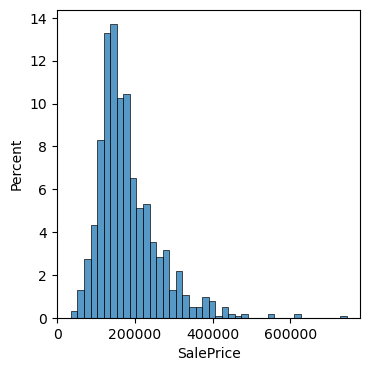

In [253]:
# Plot the histogram of target data to check for skewness

draw_hist_plot(train[['SalePrice']])

- Since this is skewed,using boxcox transformation to alter skew

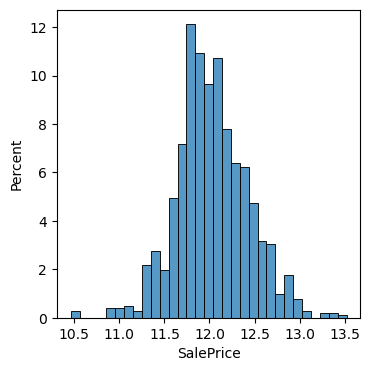

In [254]:
# After multiple iterations of lambda values,lambda is finalized to be 0

train['SalePrice'] = boxcox(train['SalePrice'],lmbda=0)
test['SalePrice'] = boxcox(test['SalePrice'],lmbda=0)
draw_hist_plot(train[['SalePrice']])

In [255]:
# Popping target variable from training and testing data to have seperate Ys
train_y=train.pop("SalePrice")
train_x = train
test_y = test.pop("SalePrice")
test_x = test

print(train_y.shape," ",train_x.shape)
print(test_y.shape," ",test_x.shape)

train_x.describe()

(1015,)   (1015, 161)
(436,)   (436, 161)


LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count   839.000000    1015.000000  1015.000000  1015.000000  1015.000000   
mean     70.169249   10581.304433     6.132020     5.588177  1971.934975   
std      25.391727   11256.175719     1.374001     1.092316    29.888876   
min      21.000000    1300.000000     2.000000     2.000000  1872.000000   
25%      58.000000    7500.000000     5.000000     5.000000  1954.000000   
50%      69.000000    9382.000000     6.000000     5.000000  1974.000000   
75%      80.000000   11513.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2   BsmtUnfSF  \
count   1015.000000  1015.000000  1015.000000  1015.000000  1015.00000   
mean    1985.143842   103.658128   431.417734    48.751724   584.55665   
std       20.396199   184.219593   466.319537   163.784614   442.85424   
min     1950.000000     0.000000     0.000000     0.000000     0.00000   
25%     1968.000000     0.000000     0.000000     0.000000   246.50000   
50%     1993.000000     0.000000   349.000000     0.000000   506.00000   
75%     2004.000000   169.000000   699.500000     0.000000   832.00000   
max     2010.000000  1600.000000  5644.000000  1120.000000  2336.00000   

       TotalBsmtSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1015.000000  1015.000000   1015.000000  1015.000000   1015.000000   
mean   1064.726108   353.057143      5.566502  1517.585222      0.414778   
std     445.584809   437.849702     46.748258   539.375068      0.523961   
min       0.000000     0.000000      0.000000   438.000000      0.000000   
25%     799.500000     0.000000      0.000000  1118.000000      0.000000   
50%     988.000000     0.000000      0.000000  1459.000000      0.000000   
75%    1298.500000   731.000000      0.000000  1786.500000      1.000000   
max    6110.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1015.000000  1015.000000  1015.000000   1015.000000   1015.000000   
mean       0.055172     1.566502     0.392118      2.858128      1.043350   
std        0.232706     0.546877     0.500431      0.805290      0.213205   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1015.000000  1015.000000  1015.000000  1015.000000    1015.000000   
mean       6.502463   474.494581    89.796059    47.804926      22.118227   
std        1.647945   212.282751   121.952244    69.381043      62.257877   
min        3.000000     0.000000     0.000000     0.000000       0.000000   
25%        5.000000   336.000000     0.000000     0.000000       0.000000   
50%        6.000000   480.000000     0.000000    25.000000       0.000000   
75%        7.000000   576.000000   168.000000    69.000000       0.000000   
max       14.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal       YrSold  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000   
mean      4.448276    15.790148     2.762562    24.082759  2007.835468   
std      34.139103    57.912761    39.807572   145.969982     1.338816   
min       0.000000     0.000000     0.000000     0.000000  2006.000000   
25%       0.000000     0.000000     0.000000     0.000000  2007.000000   
50%       0.000000     0.000000     0.000000     0.000000  2008.000000   
75%       0.000000     0.000000     0.000000     0.000000  2009.

In [256]:
# Filling the null values in Lot Frontage with their seperate mean to avoid data leakage

fill_na_train_mean = train_x['LotFrontage'].mean()
train_x['LotFrontage'] = train_x['LotFrontage'].fillna(fill_na_train_mean)

fill_na_test_mean = test_x['LotFrontage'].mean()
test_x['LotFrontage'] = test_x['LotFrontage'].fillna(fill_na_test_mean)

print(train_x['LotFrontage'].isnull().any() ," ",test_x['LotFrontage'].isnull().any())


False   False


In [257]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the train data with min max values found from training data itself

scaler = MinMaxScaler()
train_x[train_x.columns] = scaler.fit_transform(train_x[train_x.columns])

train_x.describe()

LotFrontage      LotArea  OverallQual  OverallCond    YearBuilt  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000   
mean      0.168388     0.043382     0.516502     0.512597     0.724166   
std       0.079052     0.052612     0.171750     0.156045     0.216586   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.133562     0.028979     0.375000     0.428571     0.594203   
50%       0.168388     0.037776     0.500000     0.428571     0.739130   
75%       0.198630     0.047737     0.625000     0.571429     0.927536   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1015.000000  1015.000000  1015.000000  1015.000000  1015.000000   
mean       0.585731     0.064786     0.076438     0.043528     0.250238   
std        0.339937     0.115137     0.082622     0.146236     0.189578   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.300000     0.000000     0.000000     0.000000     0.105522   
50%        0.716667     0.000000     0.061836     0.000000     0.216610   
75%        0.900000     0.105625     0.123937     0.000000     0.356164   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       TotalBsmtSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1015.000000  1015.000000   1015.000000  1015.000000   1015.000000   
mean      0.174260     0.170972      0.009732     0.207453      0.138259   
std       0.072927     0.212034      0.081728     0.103646      0.174654   
min       0.000000     0.000000      0.000000     0.000000      0.000000   
25%       0.130851     0.000000      0.000000     0.130669      0.000000   
50%       0.161702     0.000000      0.000000     0.196195      0.000000   
75%       0.212520     0.353995      0.000000     0.259128      0.333333   
max       1.000000     1.000000      1.000000     1.000000      1.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1015.000000  1015.000000  1015.000000   1015.000000   1015.000000   
mean       0.027586     0.522167     0.196059      0.357266      0.347783   
std        0.116353     0.182292     0.250215      0.100661      0.071068   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     0.333333     0.000000      0.250000      0.333333   
50%        0.000000     0.666667     0.000000      0.375000      0.333333   
75%        0.000000     0.666667     0.500000      0.375000      0.333333   
max        1.000000     1.000000     1.000000      1.000000      1.000000   

       TotRmsAbvGrd   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1015.000000  1015.000000  1015.000000  1015.000000    1015.000000   
mean       0.318406     0.334622     0.104780     0.087395       0.040069   
std        0.149813     0.149706     0.142301     0.126839       0.112786   
min        0.000000     0.000000     0.000000     0.000000       0.000000   
25%        0.181818     0.236953     0.000000     0.000000       0.000000   
50%        0.272727     0.338505     0.000000     0.045704       0.000000   
75%        0.363636     0.406206     0.196033     0.126143       0.000000   
max        1.000000     1.000000     1.000000     1.000000       1.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal       YrSold  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000   
mean      0.008756     0.032896     0.003743     0.012041     0.458867   
std       0.067203     0.120652     0.053940     0.072985     0.334704   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.250000   
50%       0.000000     0.000000     0.000000     0.000000     0.500000   
75%       0.000000     0.000000     0.000000     0.000000     0.750000   

In [258]:
print(test_x.shape)
test_x[test_x.columns] = scaler.transform(test_x[test_x.columns])
test_x.describe()

(436, 161)


LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  \
count   436.000000  436.000000   436.000000   436.000000  436.000000   
mean      0.166757    0.042238     0.500573     0.508519    0.703846   
std       0.066509    0.028615     0.174526     0.166013    0.223377   
min       0.000000    0.001776    -0.125000    -0.142857    0.072464   
25%       0.133562    0.030333     0.375000     0.428571    0.565217   
50%       0.166757    0.038678     0.500000     0.428571    0.710145   
75%       0.196062    0.048383     0.625000     0.571429    0.927536   
max       0.551370    0.324668     1.000000     1.000000    0.992754   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  \
count    436.000000  436.000000  436.000000  436.000000  436.000000   
mean       0.564450    0.064991    0.082840    0.037842    0.225507   
std        0.353839    0.108660    0.075877    0.140268    0.187736   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.233333    0.000000    0.000000    0.000000    0.082085   
50%        0.725000    0.000000    0.080971    0.000000    0.182363   
75%        0.900000    0.098750    0.130670    0.000000    0.324272   
max        1.000000    0.731250    0.337349    1.316071    0.907962   

       TotalBsmtSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  \
count   436.000000  436.000000    436.000000  436.000000    436.000000   
mean      0.169676    0.160795      0.011560    0.205272      0.148318   
std       0.068635    0.209844      0.093067    0.094784      0.168896   
min       0.000000    0.000000      0.000000   -0.019985      0.000000   
25%       0.127660    0.000000      0.000000    0.139940      0.000000   
50%       0.164075    0.000000      0.000000    0.197829      0.000000   
75%       0.211825    0.334746      0.000000    0.250144      0.333333   
max       0.400000    0.906538      0.923077    0.745196      0.666667   

       BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  \
count     436.00000  436.000000  436.000000    436.000000    436.000000   
mean        0.03211    0.517584    0.177752      0.360952      0.350917   
std         0.12731    0.186236    0.253591      0.104753      0.077947   
min         0.00000    0.000000    0.000000      0.000000      0.333333   
25%         0.00000    0.333333    0.000000      0.250000      0.333333   
50%         0.00000    0.666667    0.000000      0.375000      0.333333   
75%         0.00000    0.666667    0.500000      0.375000      0.333333   
max         1.00000    1.000000    1.000000      0.750000      1.000000   

       TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count    436.000000  436.000000  436.000000   436.000000     436.000000   
mean       0.322769    0.330000    0.122708     0.078984       0.039070   
std        0.143369    0.154220    0.154866     0.105189       0.105819   
min       -0.090909    0.000000    0.000000     0.000000       0.000000   
25%        0.272727    0.227609    0.000000     0.000000       0.000000   
50%        0.272727    0.334274    0.056593     0.043876       0.000000   
75%        0.363636    0.407087    0.215869     0.117459       0.000000   
max        0.818182    0.956276    0.779463     0.524680       0.576087   

        3SsnPorch  ScreenPorch    PoolArea     MiscVal      YrSold  \
count  436.000000   436.000000  436.000000  436.000000  436.000000   
mean     0.002090     0.028488    0.003804    0.044782    0.442087   
std      0.024724     0.106258    0.056198    0.439556    0.326863   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.000000     0.000000    0.000000    0.000000    0.250000   
50%      0.000000     0.000000    0.000000    0.000000    0.500000   
75%      0.000000     0.000000    0.000000    0.000000    0.750000   
max      0.358268     0.825000    0.878049    7.750000    1.000000   

        ExterQual   ExterCond    BsmtQual    BsmtCond   HeatingQC  \

In [259]:
# Checking for any features containign altogether zeros to drop,since that will not be of any use 

zero_cols = [col for col in train_x.columns if train_x[col].sum() == 0]
print(zero_cols)

[]


- Since there are no features that is altogether zero,leaving it as it is.

## Building Model

In [260]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [261]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(train_x, train_y)

rfe = RFE(estimator = lm,n_features_to_select= 50)             # running RFE
rfe = rfe.fit(train_x, train_y)

In [262]:
list(zip(train_x.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 4),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 72),
 ('MasVnrArea', False, 58),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 109),
 ('LowQualFinSF', False, 33),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 70),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 82),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 69),
 ('EnclosedPorch', False, 10),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 23),
 ('YrSold', False, 76),
 ('ExterQual', False, 103),
 ('ExterCond', False, 89),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 31),
 ('HeatingQC', False, 16),
 ('KitchenQual', True, 1),
 ('FireplaceQu', False, 26),
 ('Gara

In [263]:
rfe_col = train_x.columns[rfe.support_]
rfe_col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF2',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'BsmtQual', 'KitchenQual', 'GarageQual',
       'MSZoning_Other', 'Street_Pave', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition2_Other', 'BldgType_Other',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_Other',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Other',
       'RoofMatl_Other', 'Exterior1st_BrkFace', 'BsmtExposure_4',
       'CentralAir_Y', 'GarageType_Not Applicable',
       'GarageFinish_Not Applicable', 'SaleType_New', 'SaleCondition_Partial',
       'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_90', 'MSSubClass_190

In [264]:
train_x_rfe = train_x[rfe_col]

In [265]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(train_x_rfe, train_y)

LinearRegression()

In [266]:
# defining a function to calculate and print r2 and mse values

def score_metrics(model,train_x_rfe,train_y,test_x_rfe,test_y):

    y_pred_train = model.predict(train_x_rfe)
    y_pred_test = model.predict(test_x_rfe)
    
    metrics = []
    
    r2_train_lr = r2_score(train_y, y_pred_train)
    print("Train r2 ",r2_train_lr)
    metrics.append(r2_train_lr)

    r2_test_lr = r2_score(test_y, y_pred_test)
    print("Test r2 ",r2_test_lr)
    metrics.append(r2_test_lr)

    mse_train_lr = mean_squared_error(train_y, y_pred_train)
    print("Train mse ",mse_train_lr)
    metrics.append(mse_train_lr)

    mse_test_lr = mean_squared_error(test_y, y_pred_test)
    print("Test mse ",mse_test_lr)
    metrics.append(mse_test_lr)
    
    return metrics

In [267]:
# Predicting the scores of test data using linear regression model

lm_metrics = score_metrics(lm,train_x_rfe,train_y,test_x[rfe_col],test_y)

Train r2  0.8938804981897353
Test r2  0.8743247606015868
Train mse  0.017003404089350003
Test mse  0.019808256435544694


### Ridge and Lasso Regression

In [268]:
# Ridge Regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    

model_cv.fit(train_x_rfe,train_y) 
print(model_cv.best_params_)

#Fitting Ridge model for best alpha and printing coefficients which have been penalised
alpha = model_cv.best_params_["alpha"]
ridge = Ridge(alpha=alpha)

ridge.fit(train_x_rfe, train_y)
print(ridge.coef_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.4}
[ 0.40872299  0.52837856  0.29196329  0.24743325 -0.02268716 -0.00849422
  0.83746562  0.19523112  0.20216441  0.1096484  -0.1559417   0.25719915
  0.22115994  0.11628428  0.11340186  0.1322483  -0.23363884  0.1422846
  0.10712892  0.21491125 -0.15846917  0.09732656 -0.13159876  0.10352712
  0.1892036  -0.18628458  0.15126522  0.14579454  0.07519262  0.1376769
 -0.28570486 -0.10671103  0.16117312  0.08112171  0.12382303  0.12679914
  0.11962328  0.09798113 -0.11893471  0.10668594  0.08824008  0.10474269
  0.03038562  0.03038562  0.14094652 -0.11450481 -0.13877165  0.06014484
  0.07183261  0.16307259]


In [269]:
# Predicting the scores of test data using Ridge regularization model

ridge_metrics = score_metrics(ridge,train_x_rfe,train_y,test_x[rfe_col],test_y)

Train r2  0.8931218425815439
Test r2  0.8797108660821947
Train mse  0.01712496259321287
Test mse  0.018959327409751873


In [270]:
# Lasso Regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

model_cv.fit(train_x_rfe,train_y) 
print(model_cv.best_params_)

#Fitting Lasso model for the best alpha and printing coefficients which have been penalised

alpha = model_cv.best_params_["alpha"]
lasso = Lasso(alpha=alpha)

lasso.fit(train_x_rfe, train_y)
print(lasso.coef_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}
[ 0.4165648   0.5329292   0.29850879  0.26325971 -0.01769822 -0.0138219
  0.98832578  0.18981626  0.18041017  0.1007008  -0.10755935  0.2085501
  0.2049992   0.10928572  0.09849496  0.12434711 -0.25919139  0.14081399
  0.09866268  0.1855581  -0.15645543  0.08271752 -0.12665854  0.1038773
  0.1836506  -0.18720953  0.13974922  0.14374025  0.0725024   0.13052173
 -0.29067181 -0.10113444  0.12409354  0.04114661  0.08132391  0.09297607
  0.08252258  0.09509552 -0.1223361   0.10028928  0.08444513  0.10122565
  0.03934264  0.          0.08767656 -0.06153799 -0.1364364   0.01992533
  0.05147496  0.13140223]


In [271]:
# Predicting the scores of test data using Lasso regularization regression model

lasso_metrics = score_metrics(lasso,train_x_rfe,train_y,test_x[rfe_col],test_y)

Train r2  0.8929399479584889
Test r2  0.881657890911864
Train mse  0.01715410735666093
Test mse  0.018652447810420497


## Comparing all the models 

In [272]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': lm_metrics
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.893880          0.893122          0.892940
1   R2 Score (Test)           0.874325          0.879711          0.881658
2       MSE (Train)           0.017003          0.017125          0.017154
3        MSE (Test)           0.019808          0.018959          0.018652

- **Choosing Lasso as the final model since that has high test R2 score and less test MSE**

In [273]:
betas = pd.DataFrame(index=train_x_rfe.columns)
betas.rows = train_x_rfe.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

Linear     Ridge     Lasso
LotArea                      0.480577  0.408723  0.416565
OverallQual                  0.529237  0.528379  0.532929
OverallCond                  0.298378  0.291963  0.298509
YearBuilt                    0.264524  0.247433  0.263260
BsmtFinSF2                  -0.024274 -0.022687 -0.017698
TotalBsmtSF                 -0.137380 -0.008494 -0.013822
GrLivArea                    1.076977  0.837466  0.988326
BsmtFullBath                 0.197999  0.195231  0.189816
FullBath                     0.171506  0.202164  0.180410
HalfBath                     0.096437  0.109648  0.100701
KitchenAbvGr                -0.196354 -0.155942 -0.107559
TotRmsAbvGrd                 0.202471  0.257199  0.208550
GarageArea                   0.206590  0.221160  0.204999
WoodDeckSF                   0.108966  0.116284  0.109286
3SsnPorch                    0.118652  0.113402  0.098495
ScreenPorch                  0.134854  0.132248  0.124347
PoolArea                    -0.305208 -0.233639 -0.259191
BsmtQual                     0.153254  0.142285  0.140814
KitchenQual                  0.099999  0.107129  0.098663
GarageQual                   0.244109  0.214911  0.185558
MSZoning_Other              -0.166898 -0.158469 -0.156455
Street_Pave                  0.112786  0.097327  0.082718
Neighborhood_BrDale         -0.124915 -0.131599 -0.126659
Neighborhood_BrkSide         0.108345  0.103527  0.103877
Neighborhood_Crawfor         0.185500  0.189204  0.183651
Neighborhood_MeadowV        -0.191172 -0.186285 -0.187210
Neighborhood_NoRidge         0.141171  0.151265  0.139749
Neighborhood_NridgHt         0.148029  0.145795  0.143740
Neighborhood_Somerst         0.079515  0.075193  0.072502
Neighborhood_StoneBr         0.135691  0.137677  0.130522
Condition2_Other            -0.316252 -0.285705 -0.290672
BldgType_Other              -0.108052 -0.106711 -0.101134
HouseStyle_1Story            0.216169  0.161173  0.124094
HouseStyle_2Story            0.121247  0.081122  0.041147
HouseStyle_Other             0.168905  0.123823  0.081324
HouseStyle_SFoyer            0.182449  0.126799  0.092976
HouseStyle_SLvl              0.170733  0.119623  0.082523
RoofStyle_Other              0.102645  0.097981  0.095096
RoofMatl_Other              -0.136442 -0.118935 -0.122336
Exterior1st_BrkFace          0.101731  0.106686  0.100289
BsmtExposure_4               0.083496  0.088240  0.084445
CentralAir_Y                 0.104508  0.104743  0.101226
GarageType_Not Applicable    0.038711  0.030386  0.039343
GarageFinish_Not Applicable  0.038711  0.030386  0.000000
SaleType_New                 0.192120  0.140947  0.087677
SaleCondition_Partial       -0.166193 -0.114505 -0.061538
MSSubClass_30               -0.135086 -0.138772 -0.136436
MSSubClass_50                0.102623  0.060145  0.019925
MSSubClass_90                0.093846  0.071833  0.051475
MSSubClass_190               0.193413  0.163073  0.131402

- **Coefficients are reduced compared from Linear to Ridge,Lasso made the coefficients near zero.**

Text(0.5, 0.98, 'Error Terms')

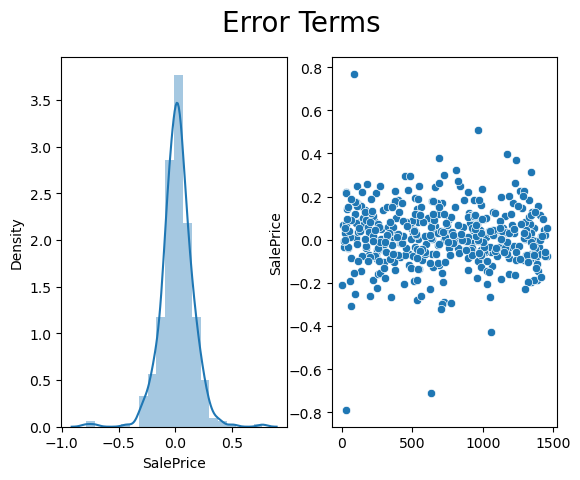

In [274]:
test_y_pred = lm.predict(test_x[rfe_col])

# Plot the graph of the error terms
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot((test_y- test_y_pred), bins = 20)

plt.subplot(1,2,2)
sns.scatterplot((test_y - test_y_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
 

- **Both normally distributed and constant variance has been checked and found to be true in test data,which confirms the assumptions of linear regression.**

In [275]:
# For making SalePrice Predictions directly ,do inverse box cox transformation

test_x_sample = test_x[rfe_col][:5]
test_y_sample = lasso.predict(test_x_sample)
print(test_y_sample)
test_y_real = inv_boxcox(test_y_sample,0)
print(test_y_real)

[11.77439608 12.36191802 12.05450564 11.62987012 12.0167143 ]
[129883.87740368 233729.0973726  171872.06043398 112405.72205838
 165497.98581792]


In [276]:
betas[['Lasso']].sort_values(by='Lasso', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'YearBuilt',
       'TotRmsAbvGrd', 'GarageArea', 'BsmtFullBath', 'GarageQual',
       'Neighborhood_Crawfor'],
      dtype='object')

- These above mentioned features are the first ten significant contributors of house SalePrice.

#### To anwer the question statements

    Which variables are significant?
**Ground Living Area is the first significant variable (0.98),follwed by Overall Quality(0.53) and LotArea(0.41).**

    How well the variables describe Housing Price?
**The choosen variables were able to explain <span style="color:green">88% of variance</span>  in test data with<span style="color:green"> mean square error of 0.018</span>. <br/>So each value predicted could have an error of 0.018 units.**

    What is the Optimal value of aplha for Ridge and Lasso Regression?
**Optimal alpha for Ridge Regression - 0.4<br/>
  Optimal alpha for Lasso Regression - 0.0001**


### Subjective Questions

In [277]:
# 1. What is the optimal value of alpha for ridge and lasso regression?
# What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?
# What will be the most important predictor variables after the change is implemented?

ridge2 = Ridge(alpha=0.8)

ridge2.fit(train_x_rfe, train_y)
betas["Ridge_2"] = ridge2.coef_

ridge2_metrics = score_metrics(ridge2,train_x_rfe,train_y,test_x[rfe_col],test_y)

final_metric["Ridge2_Regression"] = ridge2_metrics

print("Ridge Initial Significant Factors ",betas[['Ridge']].sort_values(by='Ridge', ascending=False).index[:5])
print("Ridge Significant Factors ",betas[['Ridge_2']].sort_values(by='Ridge_2', ascending=False).index[:5])

lasso2 = Lasso(alpha=0.0002)

lasso2.fit(train_x_rfe, train_y)
betas["Lasso_2"] = lasso2.coef_

lasso2_metrics = score_metrics(lasso2,train_x_rfe,train_y,test_x[rfe_col],test_y)

final_metric["Lasso2_Regression"] = lasso2_metrics


print("Lasso Significant Factors ",betas[['Lasso_2']].sort_values(by='Lasso_2', ascending=False).index[:5])
final_metric


Train r2  0.8919411265498101
Test r2  0.8821351377719107
Train mse  0.017314147346814905
Test mse  0.018577226722860878
Ridge Initial Significant Factors  Index(['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'TotRmsAbvGrd'], dtype='object')
Ridge Significant Factors  Index(['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'TotRmsAbvGrd'], dtype='object')
Train r2  0.8913511545005126
Test r2  0.8849120559936366
Train mse  0.017408677880642348
Test mse  0.018139543783088574
Lasso Significant Factors  Index(['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'YearBuilt'], dtype='object')


Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)           0.893880          0.893122          0.892940   
1   R2 Score (Test)           0.874325          0.879711          0.881658   
2       MSE (Train)           0.017003          0.017125          0.017154   
3        MSE (Test)           0.019808          0.018959          0.018652   

   Ridge2_Regression  Lasso2_Regression  
0           0.891941           0.891351  
1           0.882135           0.884912  
2           0.017314           0.017409  
3           0.018577           0.018140

In [278]:
# 3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
# You will now have to create another model excluding the five most important predictor variables. 
# Which are the five most important predictor variables now?

significant_features = ['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'YearBuilt']

train_x_rfe.drop(significant_features,axis=1,inplace = True)

lasso_next_best = Lasso(alpha=0.0001)

lasso_next_best.fit(train_x_rfe, train_y)


lasso_next_best_metrics = score_metrics(lasso_next_best,train_x_rfe,train_y,test_x[train_x_rfe.columns],test_y)

final_metric["lasso_next_best"] = lasso_next_best_metrics

print(final_metric)

betas_final = pd.DataFrame(index=train_x_rfe.columns)
betas_final.rows = train_x_rfe.columns
betas_final["lasso_next_best"] = lasso_next_best.coef_
betas_final[['lasso_next_best']].sort_values(by='lasso_next_best', ascending=False).index[:5]

Train r2  0.8523877883865357
Test r2  0.8488262776525481
Train mse  0.023651732620022525
Test mse  0.023827190406863635
             Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)           0.893880          0.893122          0.892940   
1   R2 Score (Test)           0.874325          0.879711          0.881658   
2       MSE (Train)           0.017003          0.017125          0.017154   
3        MSE (Test)           0.019808          0.018959          0.018652   

   Ridge2_Regression  Lasso2_Regression  lasso_next_best  
0           0.891941           0.891351         0.852388  
1           0.882135           0.884912         0.848826  
2           0.017314           0.017409         0.023652  
3           0.018577           0.018140         0.023827  


Index(['TotRmsAbvGrd', 'TotalBsmtSF', 'FullBath', 'GarageQual', 'GarageArea'], dtype='object')